In [11]:
import os
import pandas as pd
pd.options.display.max_rows = 10 #None
import matplotlib.pyplot as plt
import numpy as np
import datetime

from datetime import timedelta
cantonKeys = ['AG','AI','AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG','ZH']

merged = {}
dailyFeatures = {}
modelFeatures = {}

for cantonId in cantonKeys:
    d = pd.read_csv("data/merged/"+cantonId+".csv")
    d = d.set_index('date')
    merged[cantonId] = d
    
for cantonId in cantonKeys:
    d = pd.read_csv("data/dailyFeatures/"+cantonId+".csv")
    d = d.set_index('date')
    dailyFeatures[cantonId] = d
    
for cantonId in cantonKeys:
    d = pd.read_csv("data/features/"+cantonId+".csv")
    modelFeatures[cantonId] = d
    

def listToStringUnderline(list):
    str1 = "_"
    return (str1.join(list))

def listToStringComma(list):
    str1 = ", "
    return (str1.join(list))



KeyError: 'ICU_Covid19Patients'

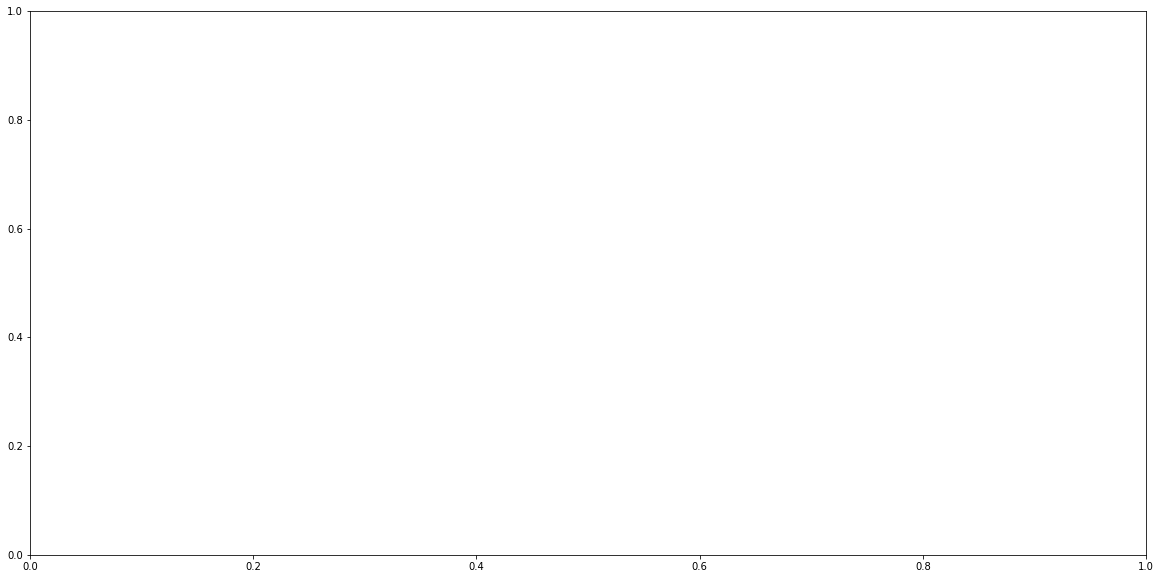

In [11]:
df.index = pd.to_datetime(df.index)
feature = ['ICU_Covid19Patients'] #, 'ICU_FreeCapacity', 'ICU_AllPatients', 'ICU_NonCovid19Patients'
#feature = ['Total_Covid19Patients','Total_NonCovid19Patients','Total_FreeCapacity','Total_AllPatients']

#feature = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']
#feature = ['meanNeighborIncidence','maxNeighborIncidence']

#feature = ['median_R_mean','median_R_highHPD','median_R_lowHPD']
#feature = ['lower_ci_day','upper_ci_day','anteil_pos']

#feature = ['case_entries','hosp_entries','death_entries','test_entries'] #
#feature = ['case_inz_entries','hosp_inz_entries','death_inz_entries','test_inz_entries']
#feature = ['test_inzsumTotal'] #'case_inzsumTotal','hosp_inzsumTotal','death_inzsumTotal',




df.reset_index().plot(kind='scatter', x='date', y=feature[0], figsize=(20,10))
df[feature].plot(kind='line', y=feature, figsize=(20,10))
df[feature].interpolate(method='linear').plot(kind='line', y=feature, figsize=(20,10))
df[feature].rolling(window=7).mean().interpolate(method='linear').plot(kind='line', y=feature, figsize=(20,10))


In [12]:
# exploring google mobility data

plotDict = {}
'''
plotDict['googleMob'] = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']

plotDict['intervistaMob'] = ['intervistaMob']

plotDict['kof'] = ['kofStrigency']

plotDict['temperature'] = ['temp_min','temp_max']

plotDict['precipitation'] = ['precipitation']

plotDict['clouds'] =['clouds']

plotDict['neigbohr'] = ['meanNeighborIncidence','maxNeighborIncidence']

plotDict['rvalue'] = ['median_R_mean','median_R_highHPD','median_R_lowHPD']

plotDict['variant'] = ['lower_ci_day','upper_ci_day','anteil_pos']

plotDict['entries'] = ['case_entries','hosp_entries','death_entries']
'''
plotDict['cases_agegroup'] = ['Cases entries 0 - 9','Cases entries 10 - 19','Cases entries 20 - 29','Cases entries 30 - 39',
                          'Cases entries 40 - 49','Cases entries 50 - 59','Cases entries 60 - 69','Cases entries 70 - 79',
                          'Cases entries 80+']
'''
plotDict['vaccineSum'] = ['VaccDosesAdministered sumTotal','FullyVaccPersons sumTotal']

plotDict['vaccinePer100Person'] = ['VaccDosesAdministered per100PersonsTotal','FullyVaccPersons per100PersonsTotal']

plotDict['death'] = ['Death entries 0 - 9','Death entries 10 - 19','Death entries 20 - 29','Death entries 30 - 39',
                     'Death entries 40 - 49','Death entries 50 - 59','Death entries 60 - 69','Death entries 70 - 79',
                     'Death entries 80+']

for colsOfInterest in plotDict:
    pltDf = dict['AG']
    pltDf = pltDf[plotDict[colsOfInterest]]
    display(pltDf)
    #df.index = pd.to_datetime(df.index)
    pltDf.plot.scatter(x=df.index,y=colsOfInterest)
    #df[plotDict[colsOfInterest]].rolling(window=7).mean().interpolate(method='linear').plot(kind='line', y=plotDict[colsOfInterest], figsize=(20,10))
    plt.show()
    #.rolling(window=7).mean()
'''

"\nplotDict['vaccineSum'] = ['VaccDosesAdministered sumTotal','FullyVaccPersons sumTotal']\n\nplotDict['vaccinePer100Person'] = ['VaccDosesAdministered per100PersonsTotal','FullyVaccPersons per100PersonsTotal']\n\nplotDict['death'] = ['Death entries 0 - 9','Death entries 10 - 19','Death entries 20 - 29','Death entries 30 - 39',\n                     'Death entries 40 - 49','Death entries 50 - 59','Death entries 60 - 69','Death entries 70 - 79',\n                     'Death entries 80+']\n\nfor colsOfInterest in plotDict:\n    pltDf = dict['AG']\n    pltDf = pltDf[plotDict[colsOfInterest]]\n    display(pltDf)\n    #df.index = pd.to_datetime(df.index)\n    pltDf.plot.scatter(x=df.index,y=colsOfInterest)\n    #df[plotDict[colsOfInterest]].rolling(window=7).mean().interpolate(method='linear').plot(kind='line', y=plotDict[colsOfInterest], figsize=(20,10))\n    plt.show()\n    #.rolling(window=7).mean()\n"

In [12]:
display([col for col in dailyFeatures['AG'].columns])

['Cases inz_entries female',
 'Cases inz_entries male',
 'Cases inzsumTotal female',
 'Cases inzsumTotal male',
 'Death inz_entries female',
 'Death inz_entries male',
 'Death inzsumTotal female',
 'Death inzsumTotal male',
 'Hosp inz_entries female',
 'Hosp inz_entries male',
 'Hosp inzsumTotal female',
 'Hosp inzsumTotal male',
 'case_inzsumTotal',
 'hosp_inzsumTotal',
 'death_inzsumTotal',
 'test_inzsumTotal',
 'median_R_mean',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'kofStrigency',
 'Borders',
 'Events',
 'Gatherings/private events',
 'Demonstrations',
 'Primary (includes kindergarten) and lower secondary school',
 'Upper secondary school, vocational schools and higher education',
 'Universities and other educational establishments',
 'Mo

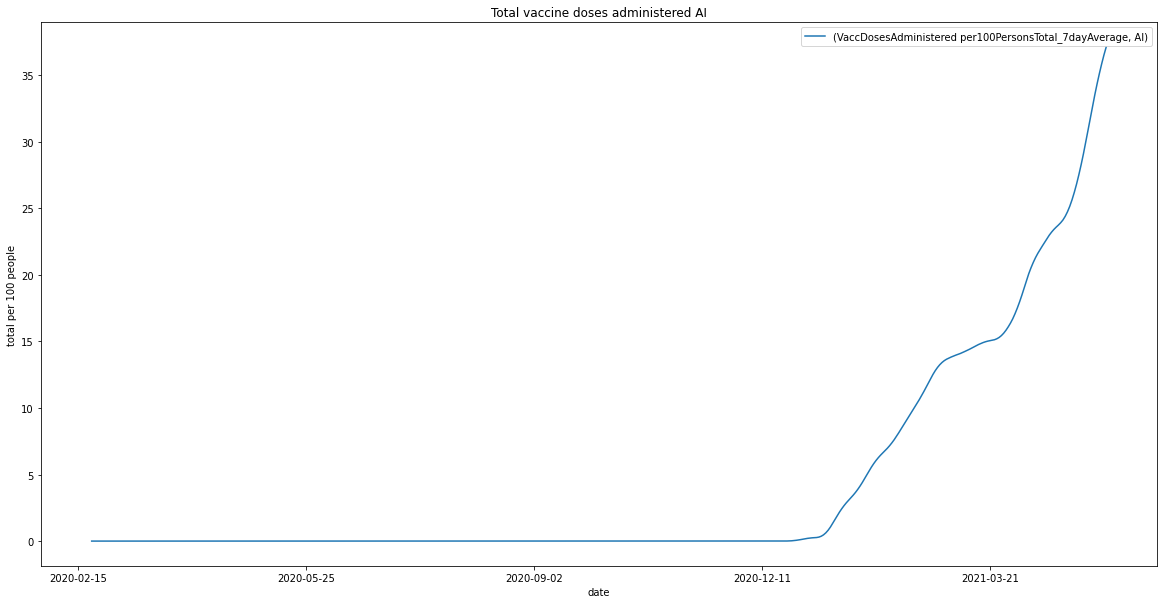

<Figure size 432x288 with 0 Axes>

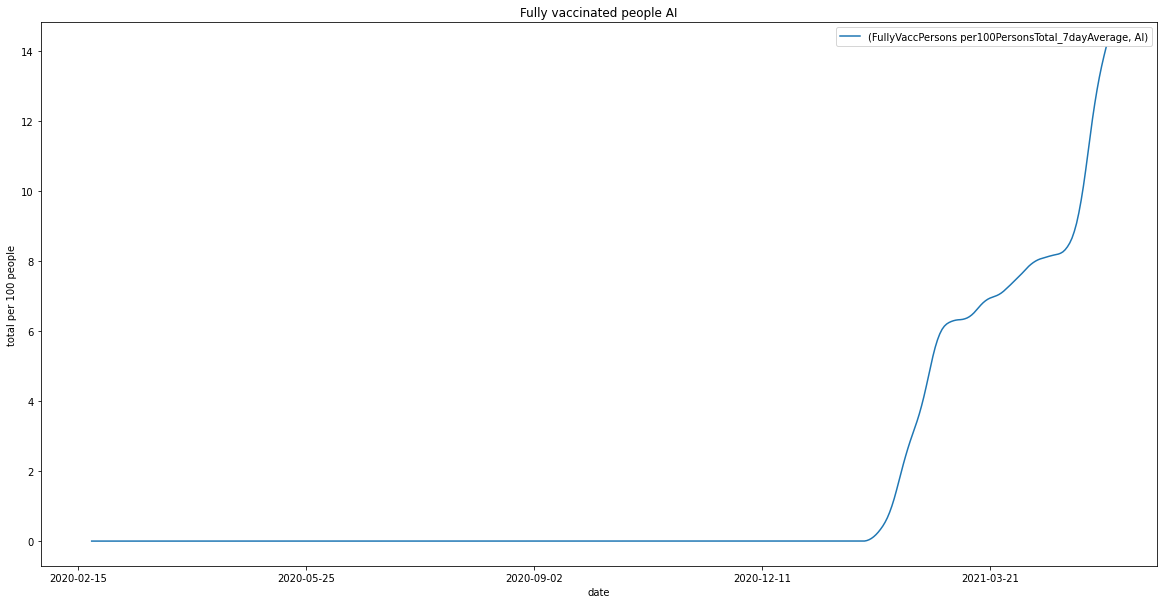

<Figure size 432x288 with 0 Axes>

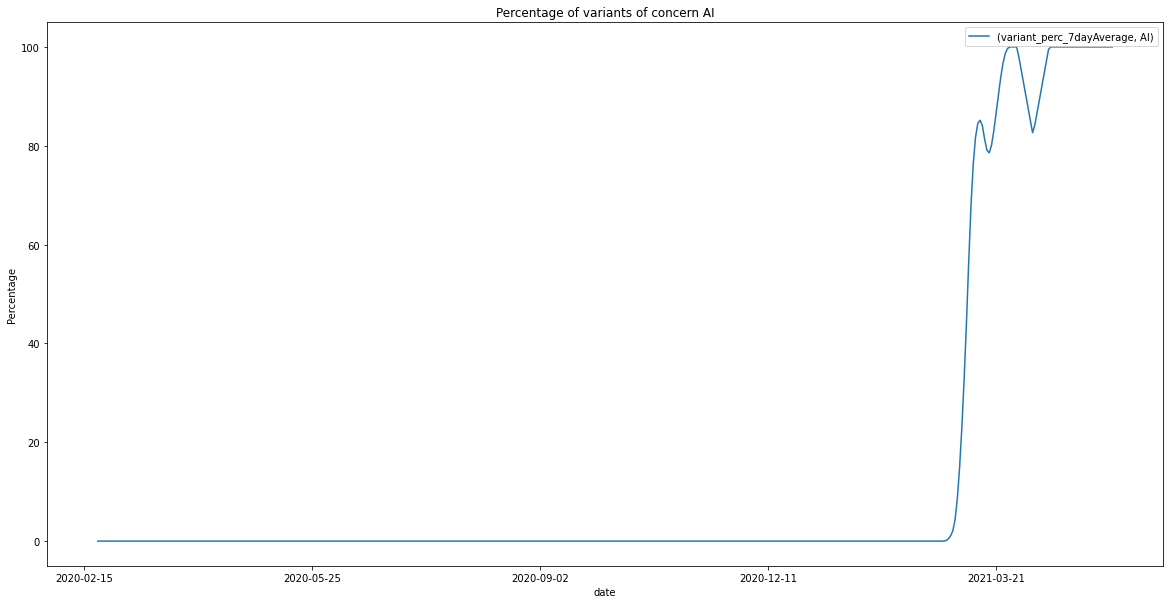

<Figure size 432x288 with 0 Axes>

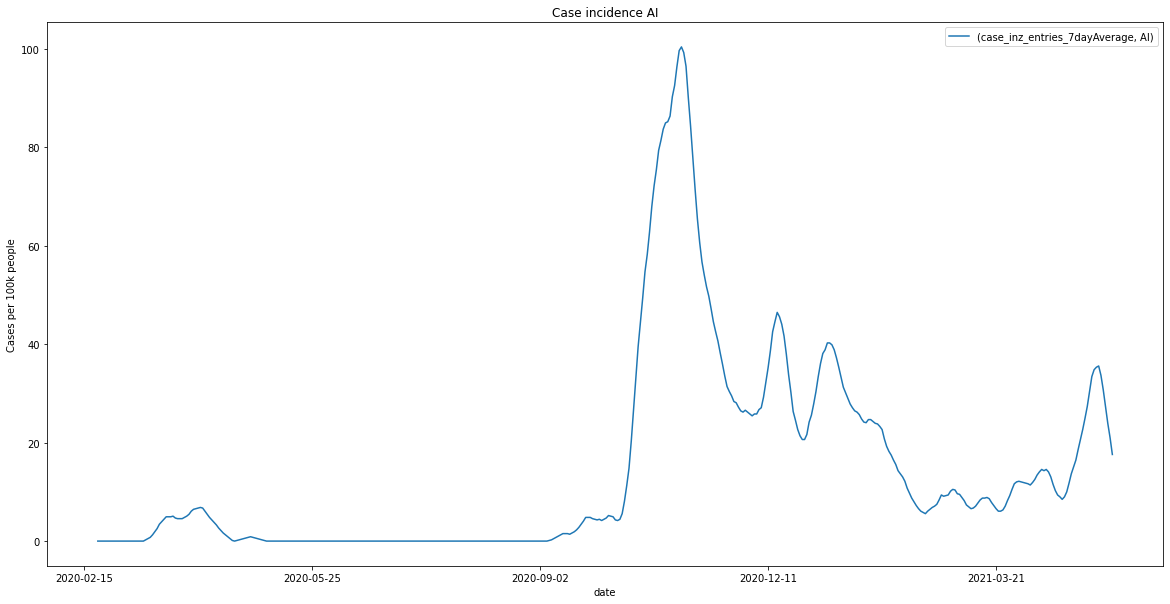

<Figure size 432x288 with 0 Axes>

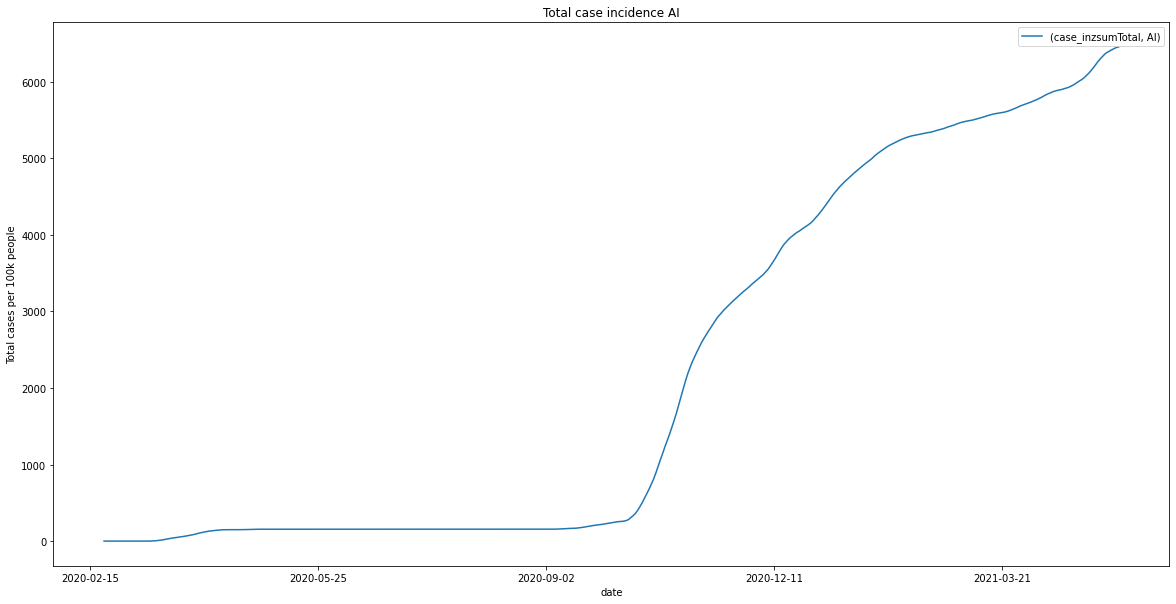

<Figure size 432x288 with 0 Axes>

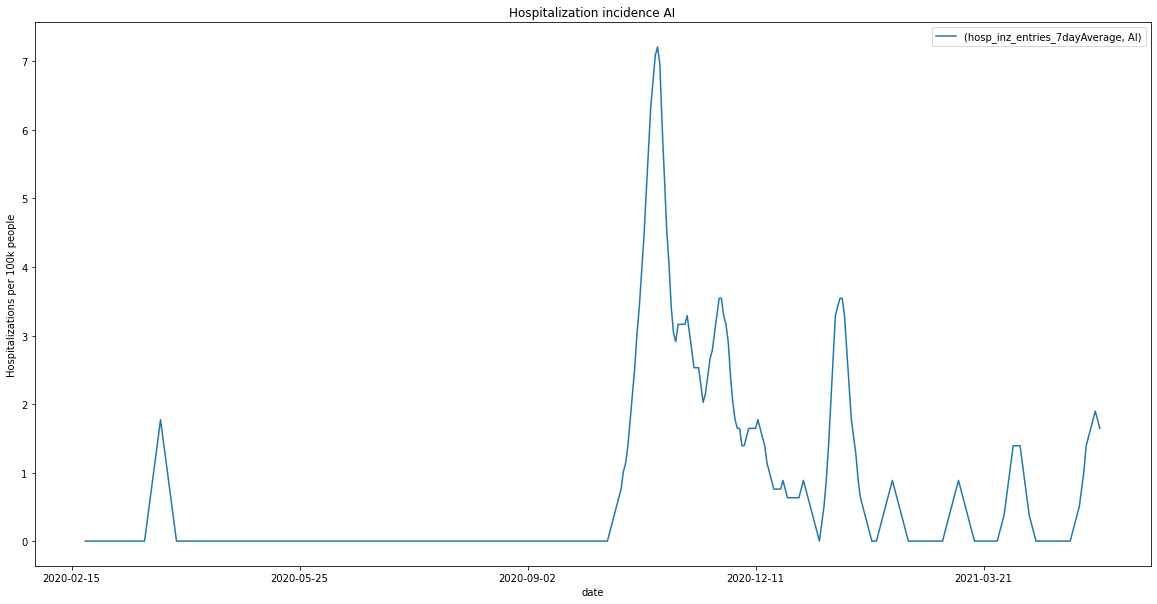

<Figure size 432x288 with 0 Axes>

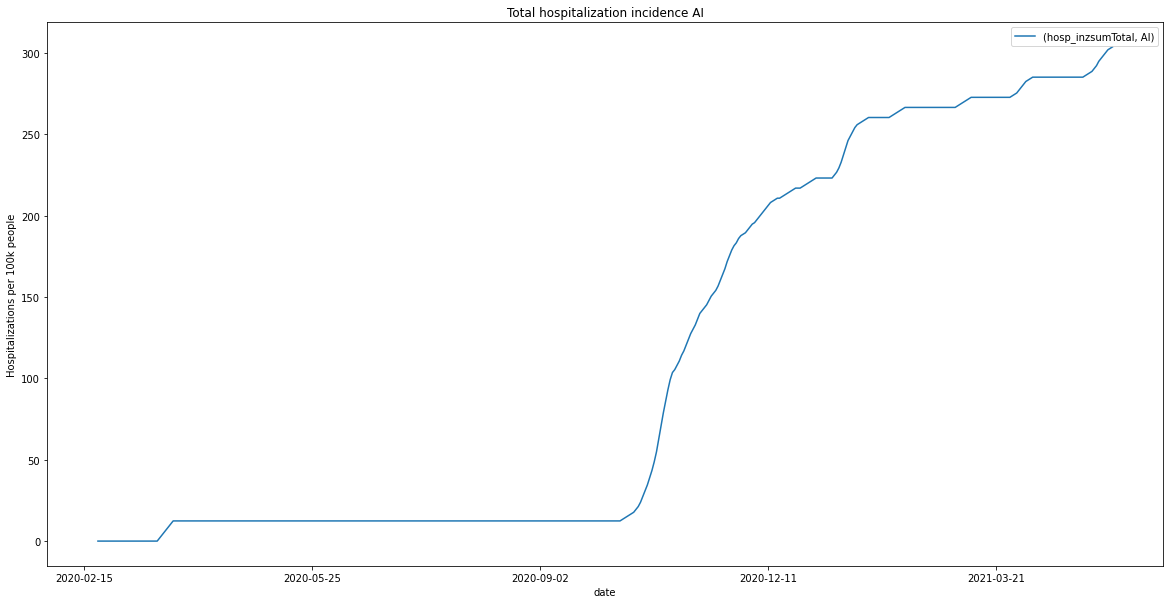

<Figure size 432x288 with 0 Axes>

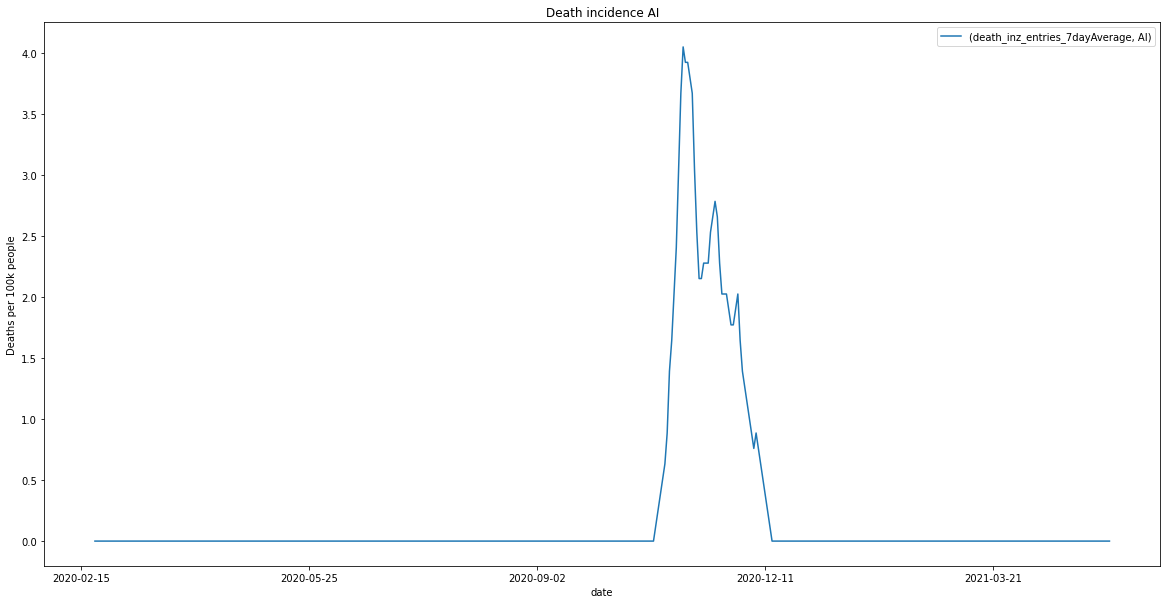

<Figure size 432x288 with 0 Axes>

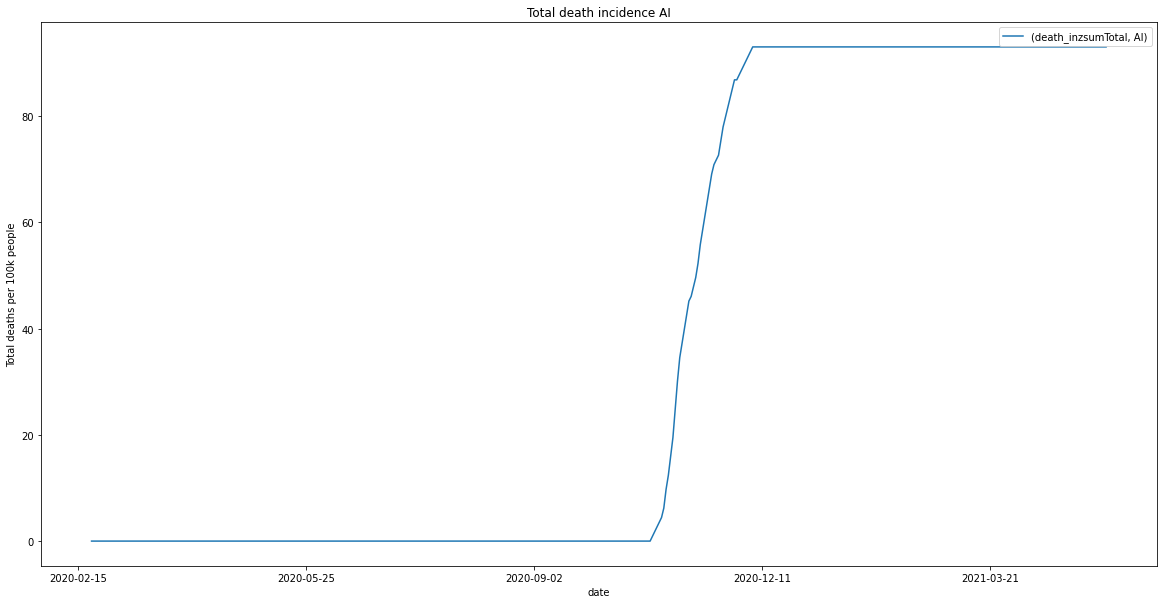

<Figure size 432x288 with 0 Axes>

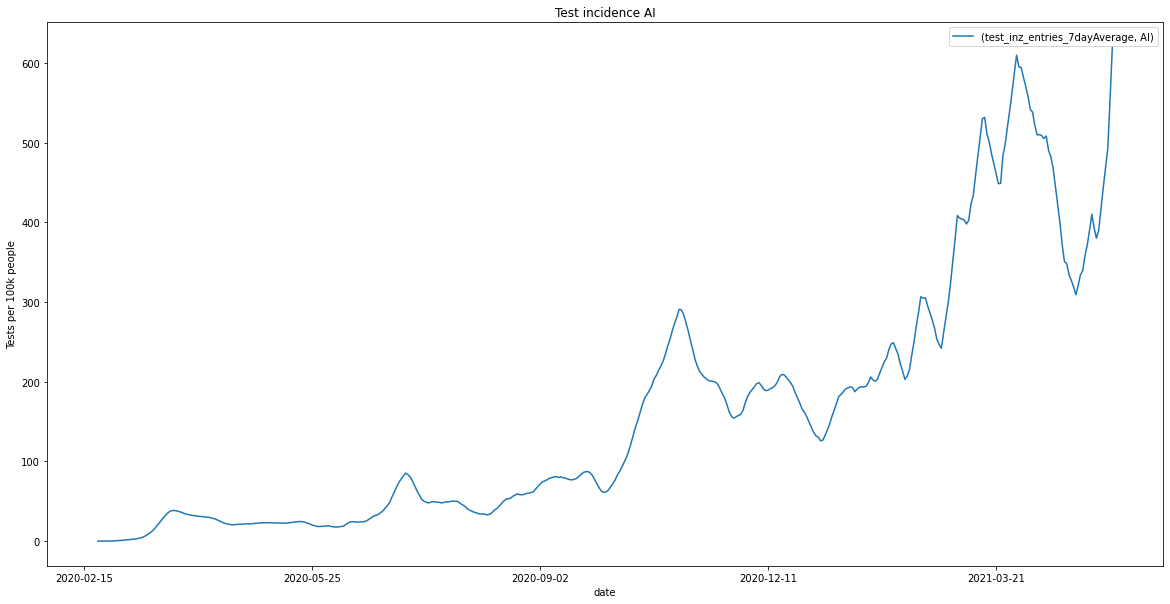

<Figure size 432x288 with 0 Axes>

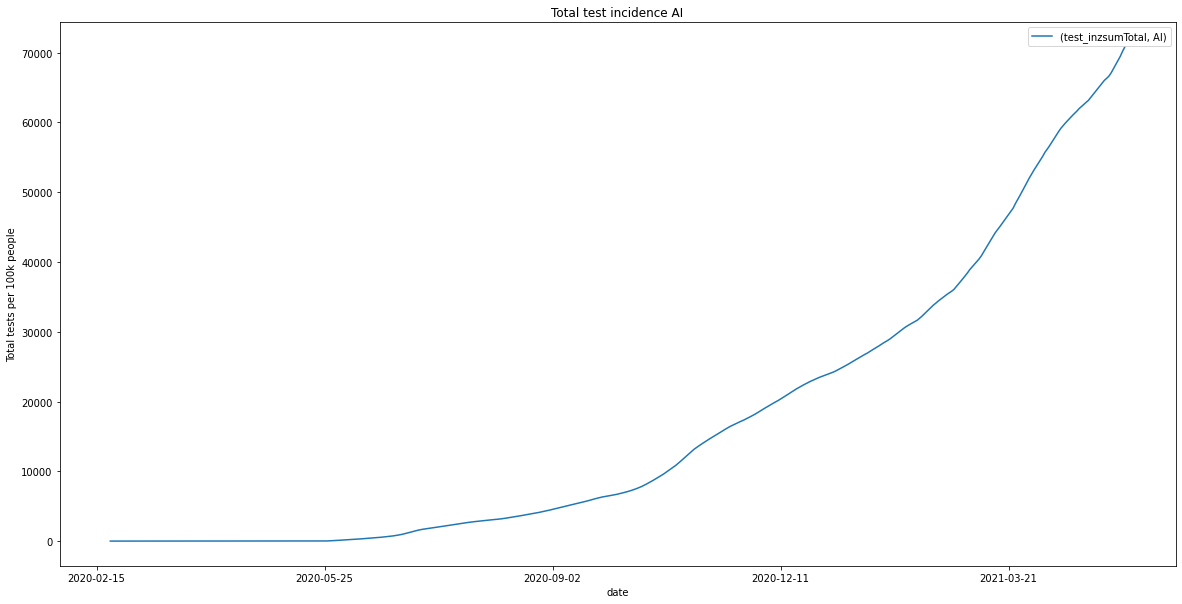

<Figure size 432x288 with 0 Axes>

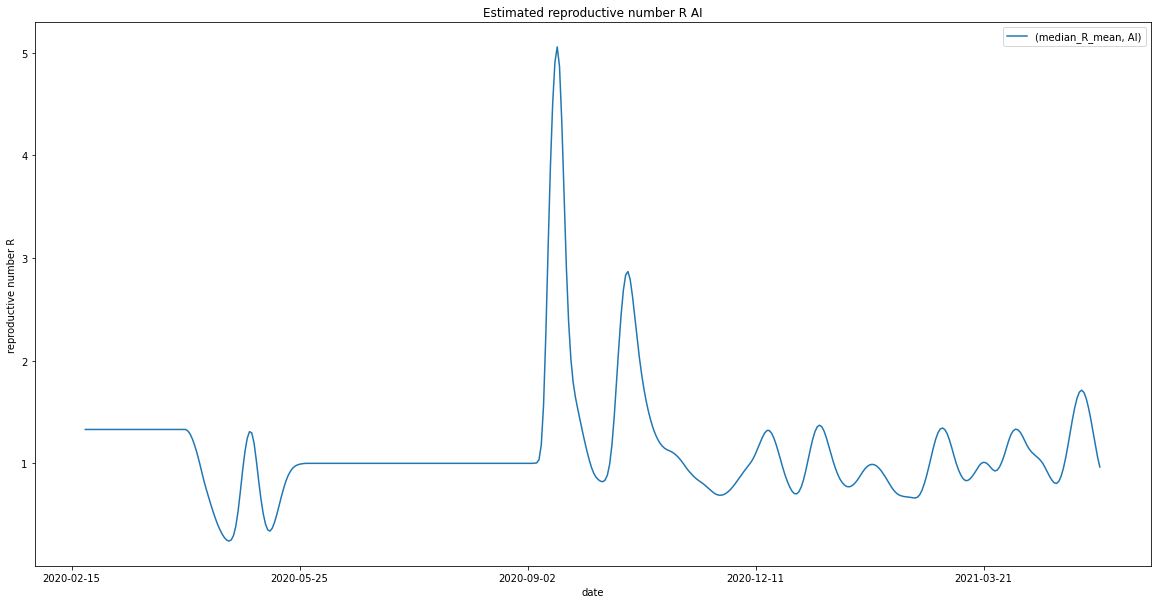

<Figure size 432x288 with 0 Axes>

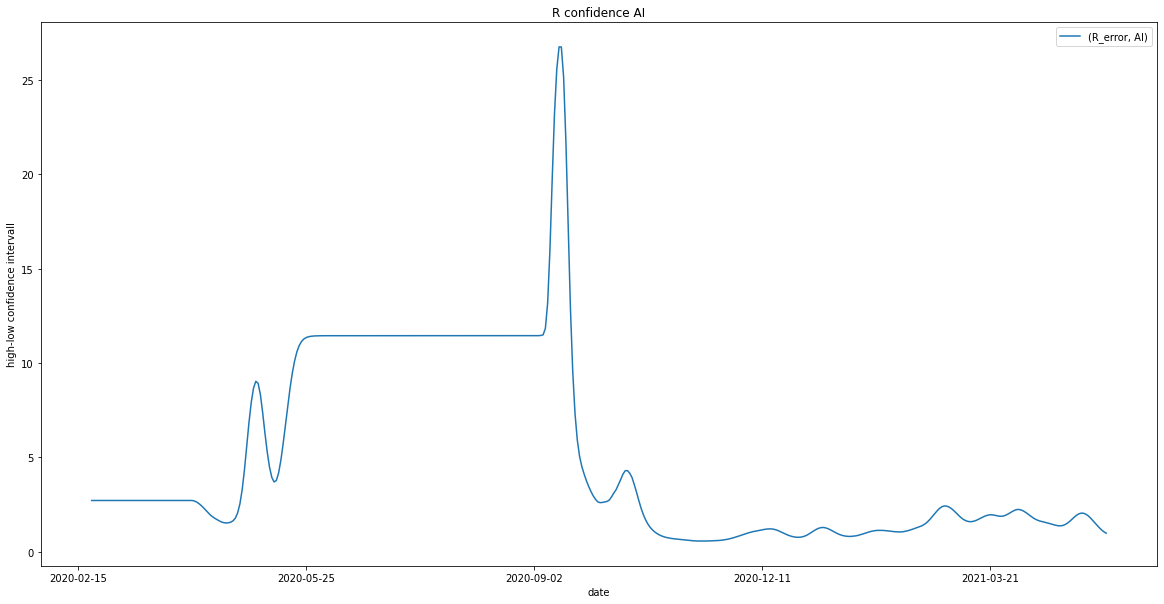

<Figure size 432x288 with 0 Axes>

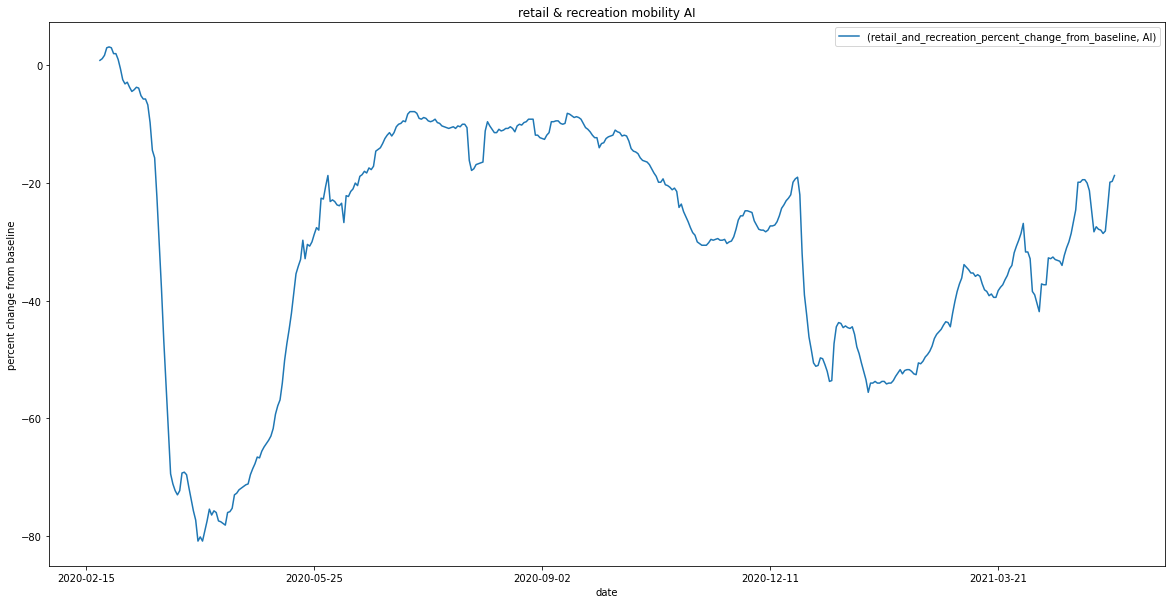

<Figure size 432x288 with 0 Axes>

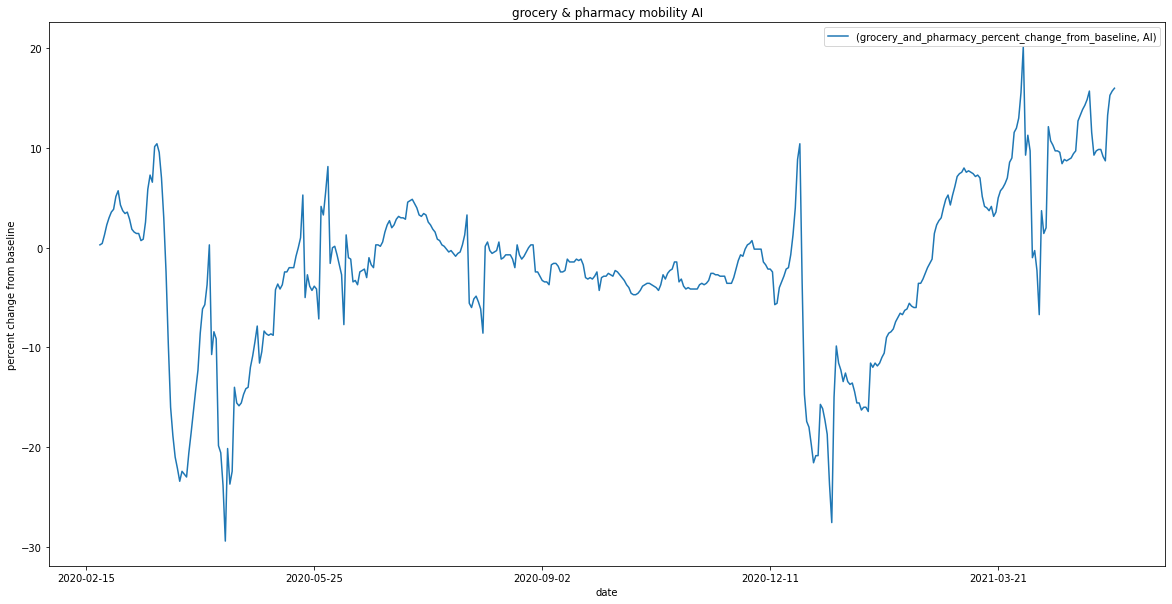

<Figure size 432x288 with 0 Axes>

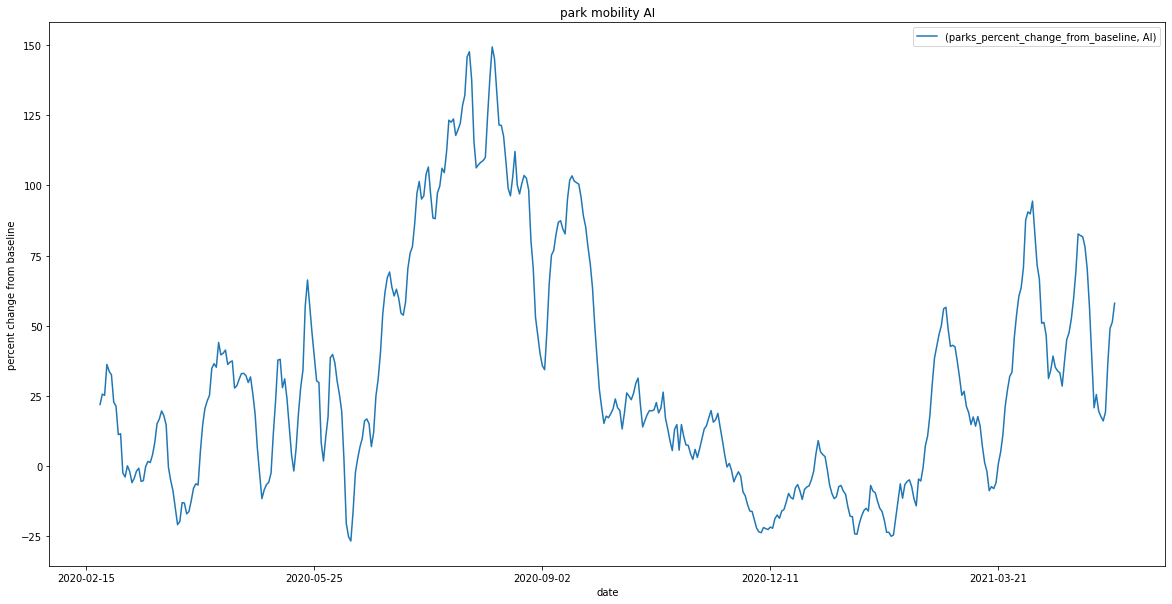

<Figure size 432x288 with 0 Axes>

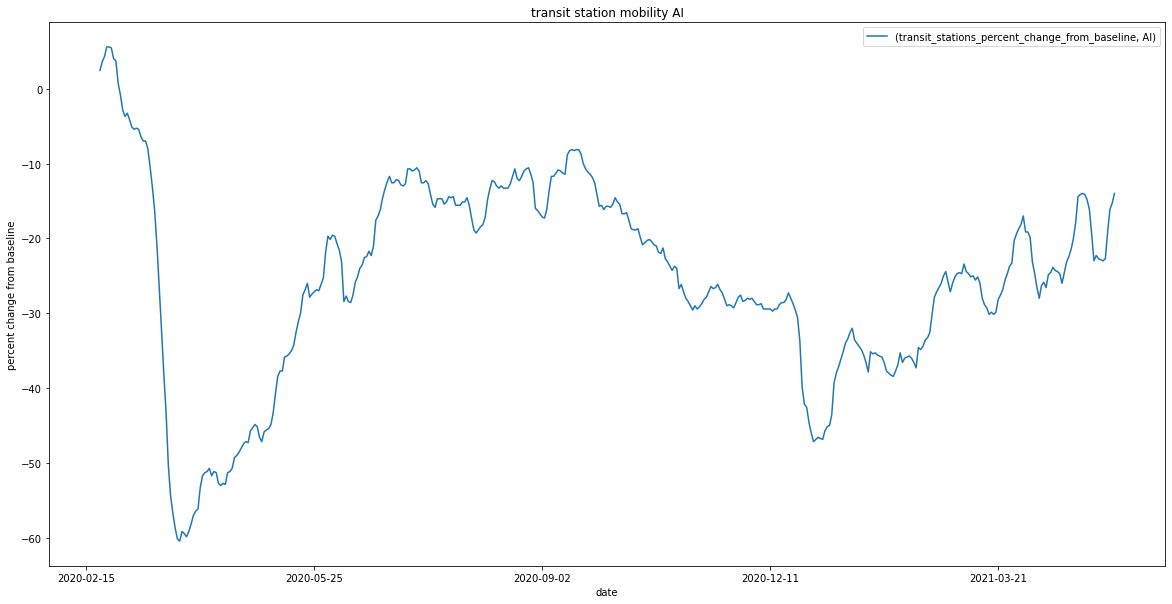

<Figure size 432x288 with 0 Axes>

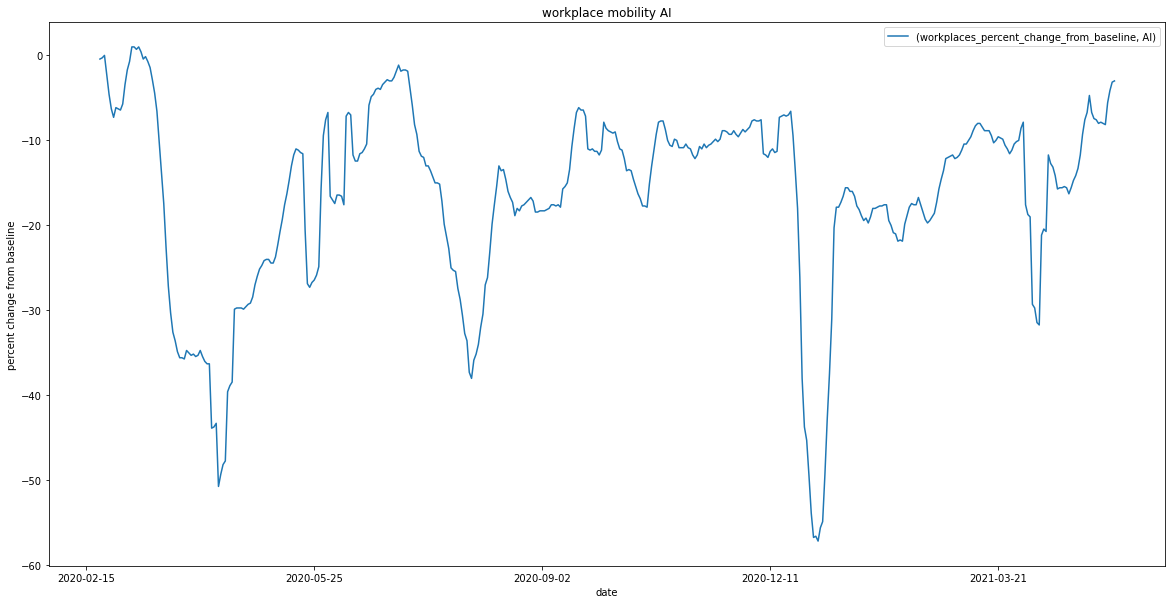

<Figure size 432x288 with 0 Axes>

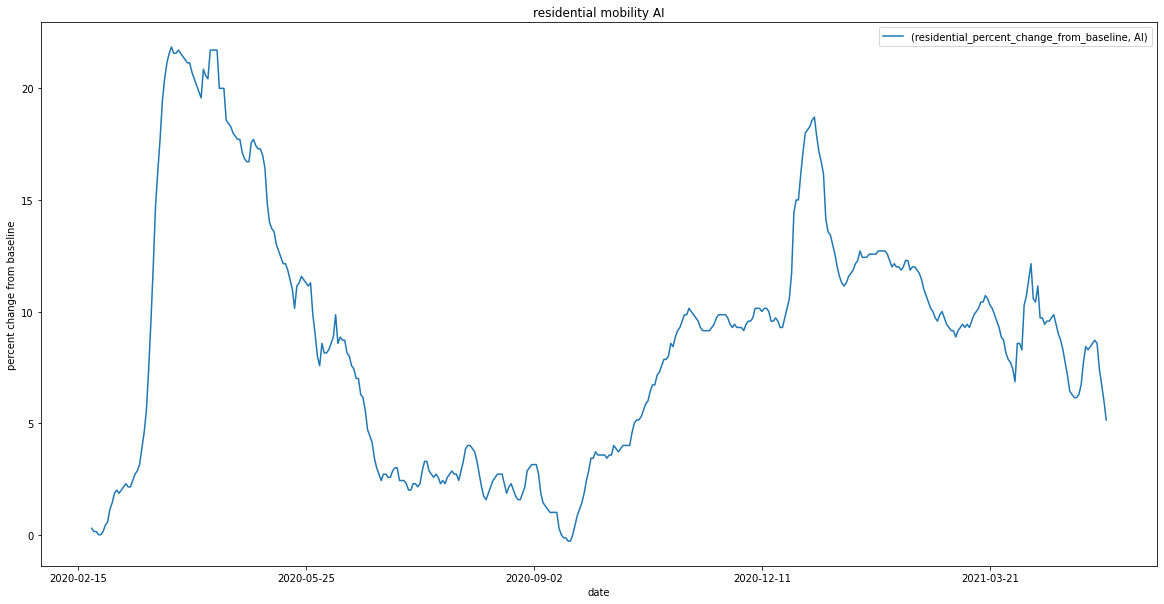

<Figure size 432x288 with 0 Axes>

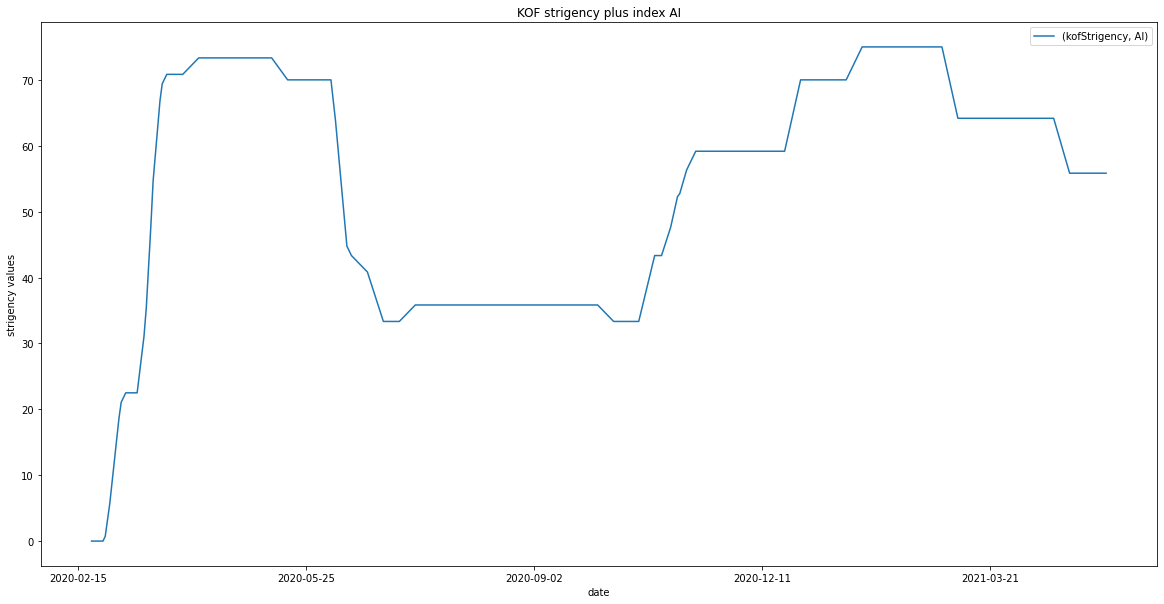

<Figure size 432x288 with 0 Axes>

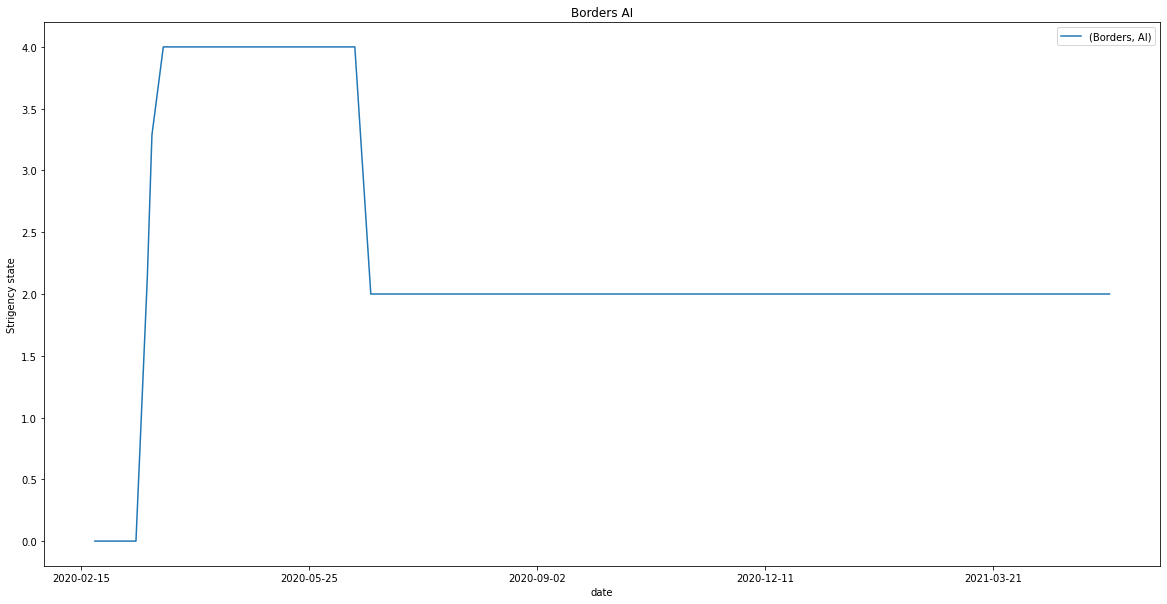

<Figure size 432x288 with 0 Axes>

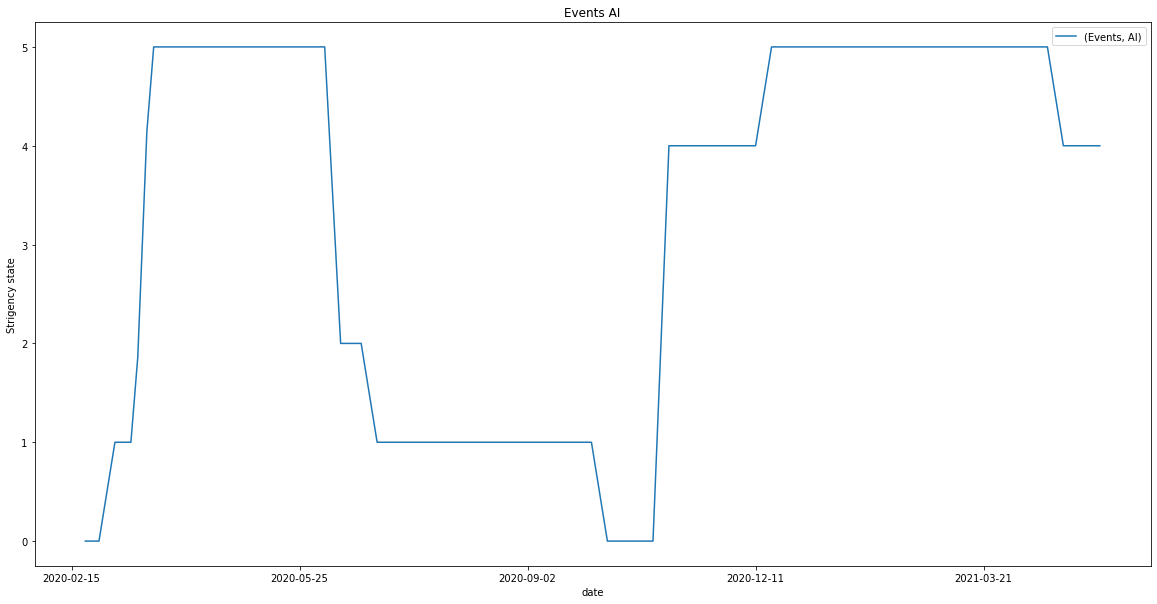

<Figure size 432x288 with 0 Axes>

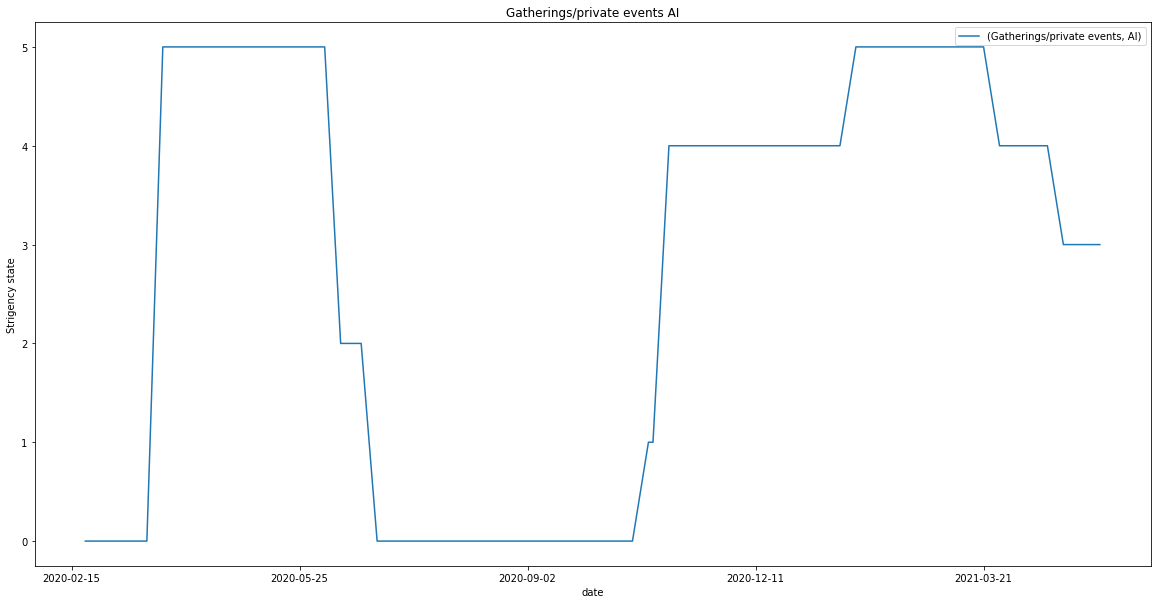

<Figure size 432x288 with 0 Axes>

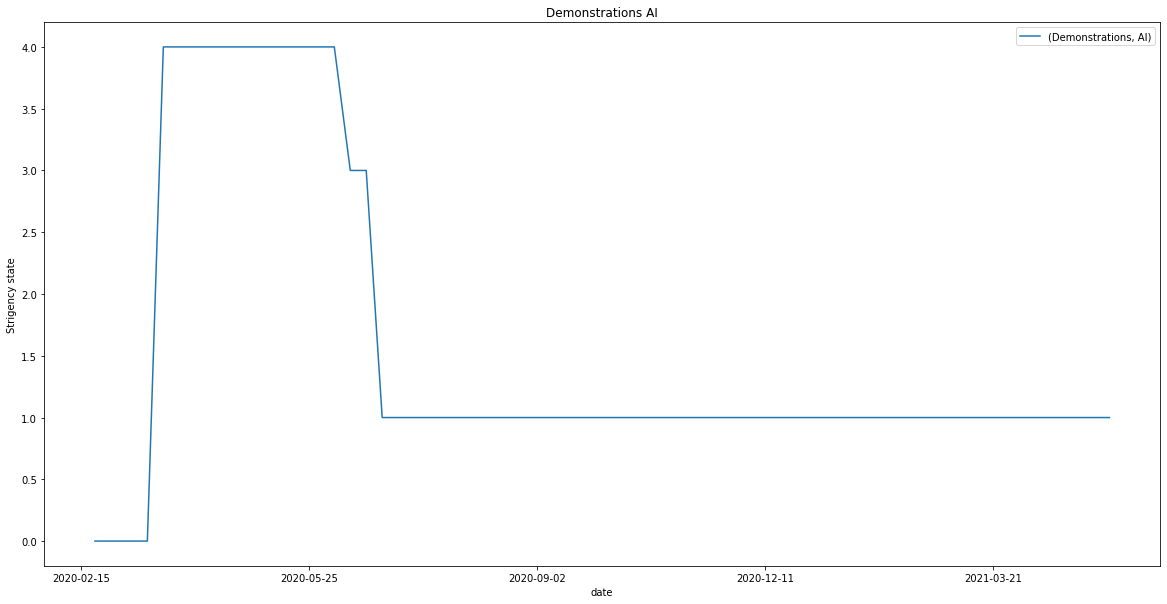

<Figure size 432x288 with 0 Axes>

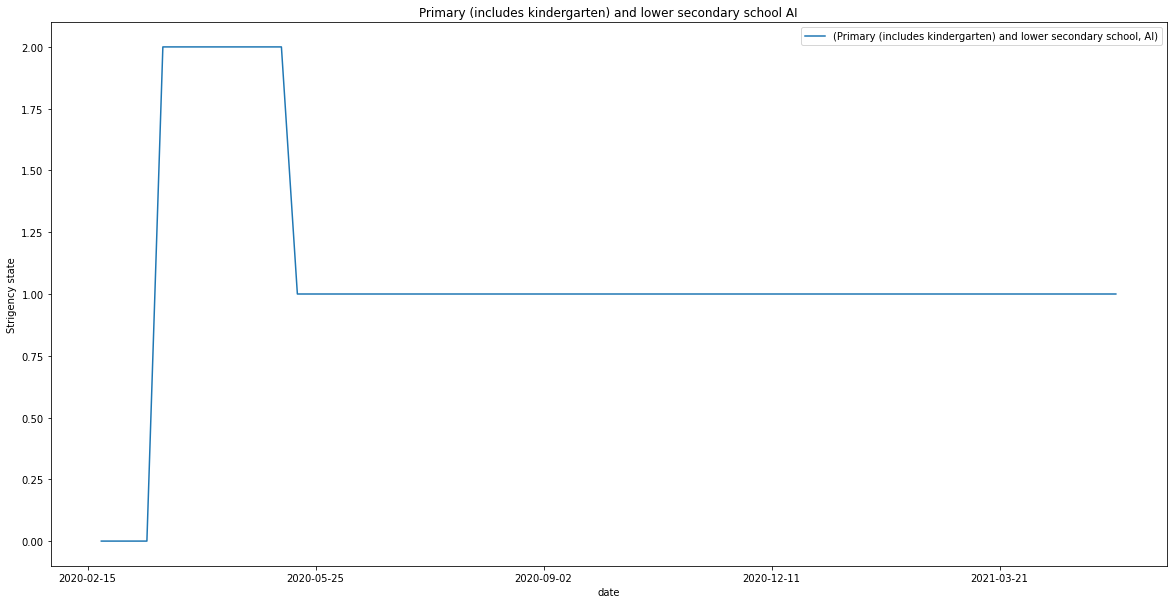

<Figure size 432x288 with 0 Axes>

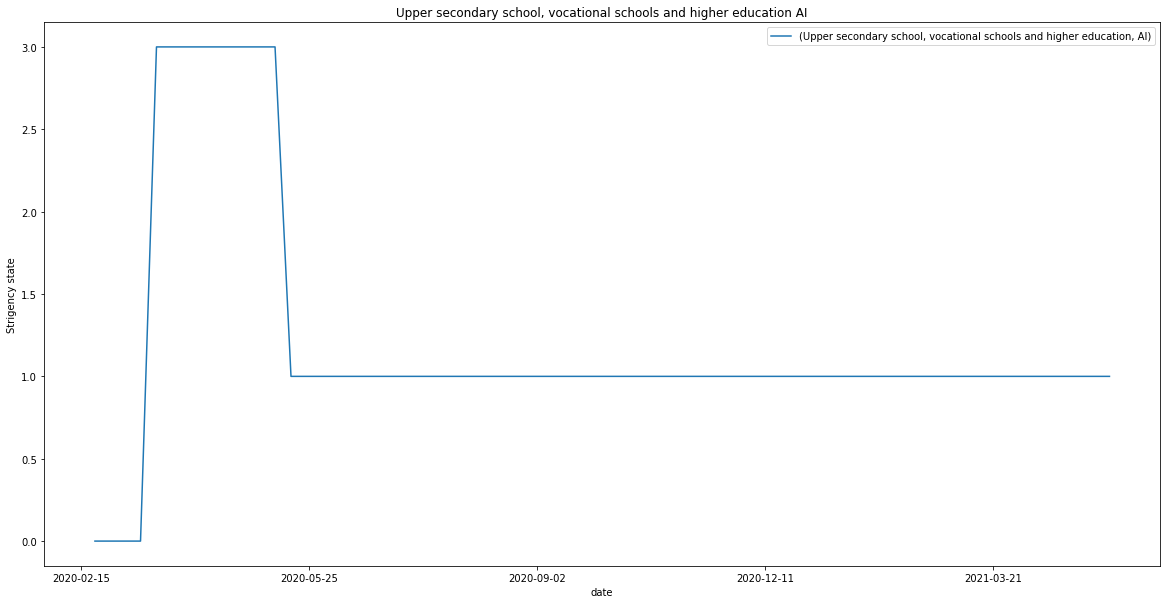

<Figure size 432x288 with 0 Axes>

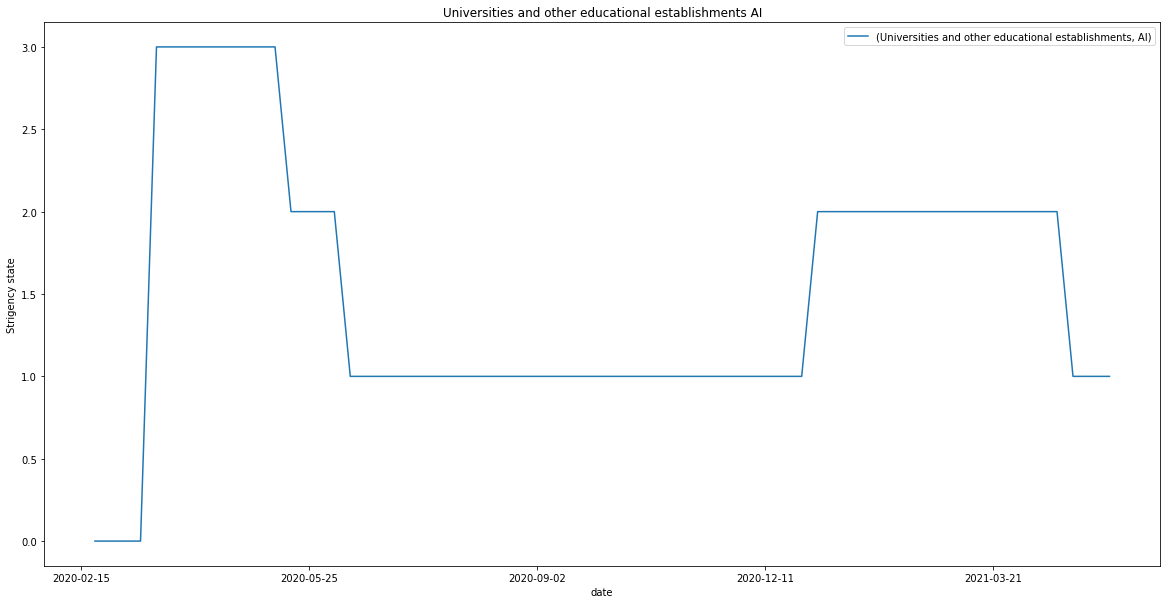

<Figure size 432x288 with 0 Axes>

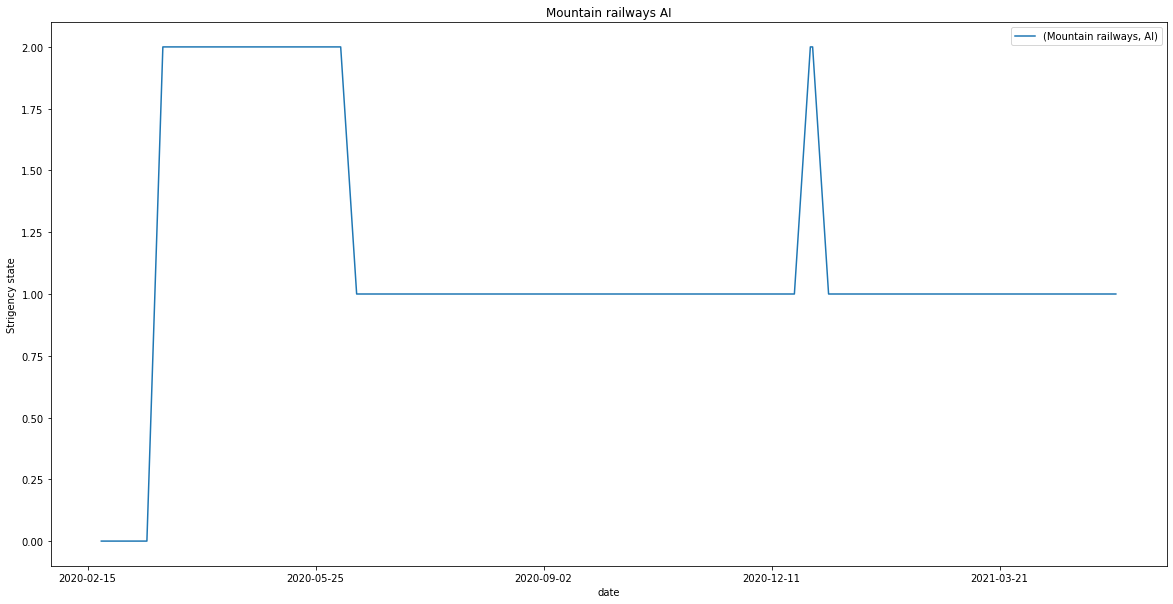

<Figure size 432x288 with 0 Axes>

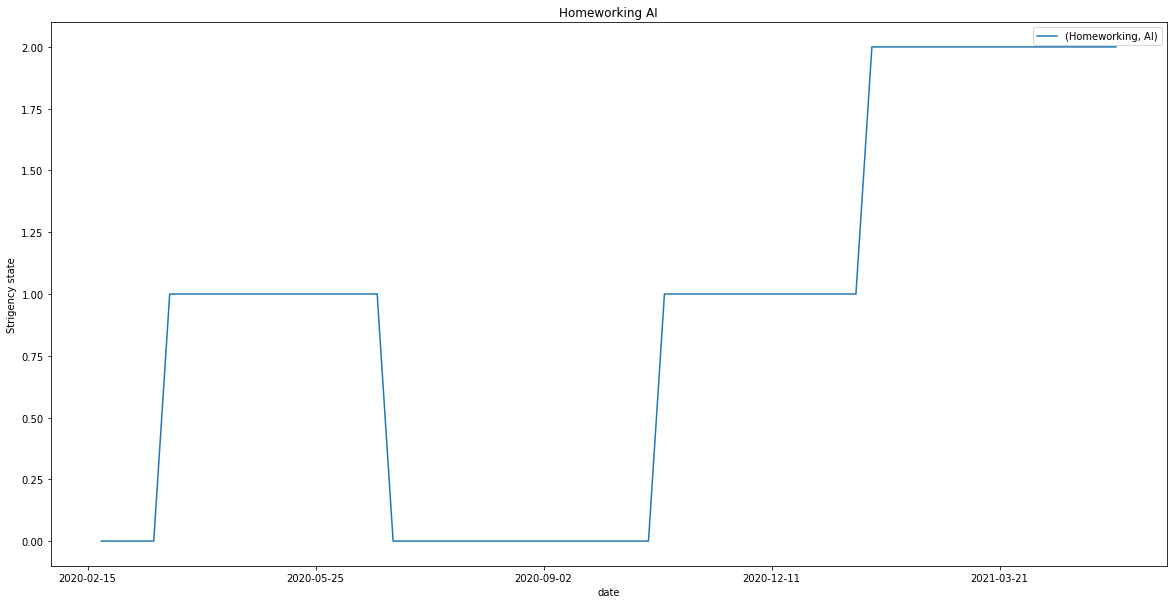

<Figure size 432x288 with 0 Axes>

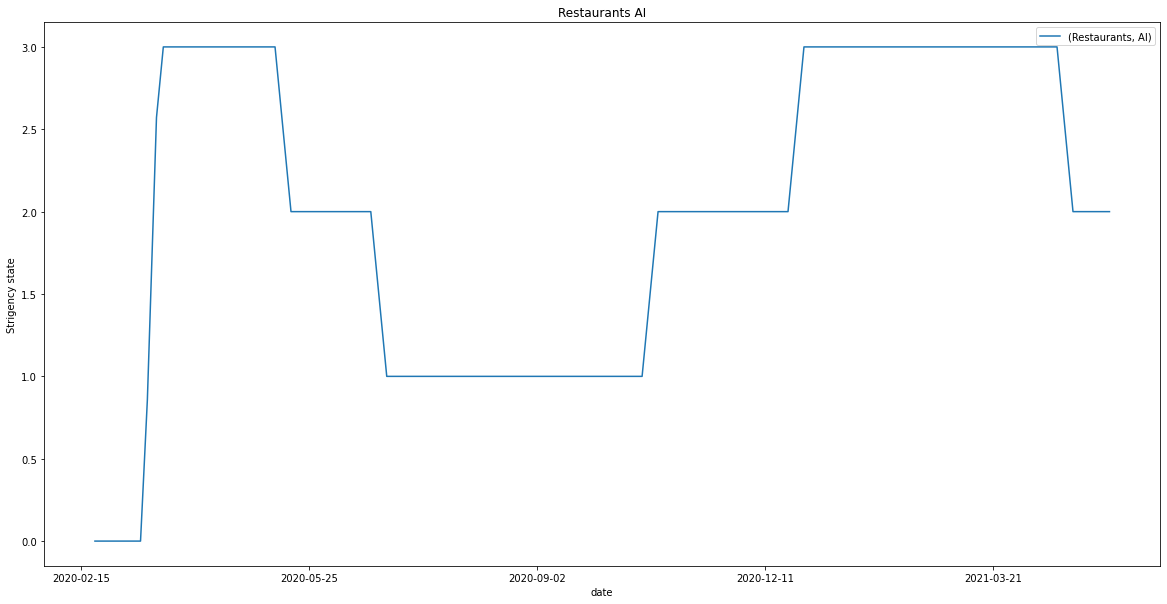

<Figure size 432x288 with 0 Axes>

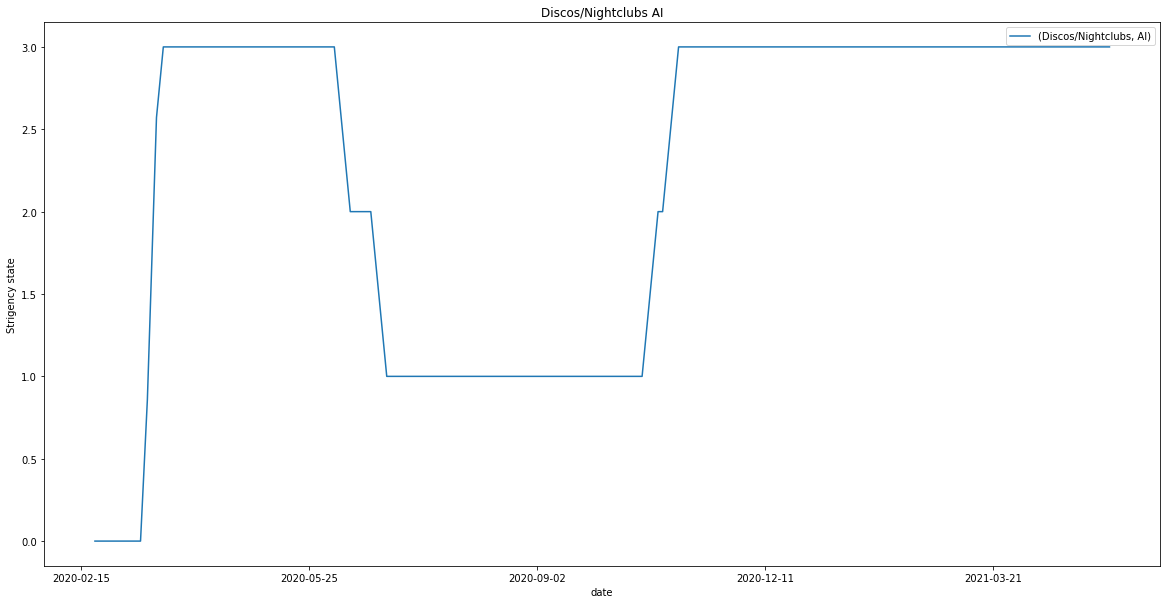

<Figure size 432x288 with 0 Axes>

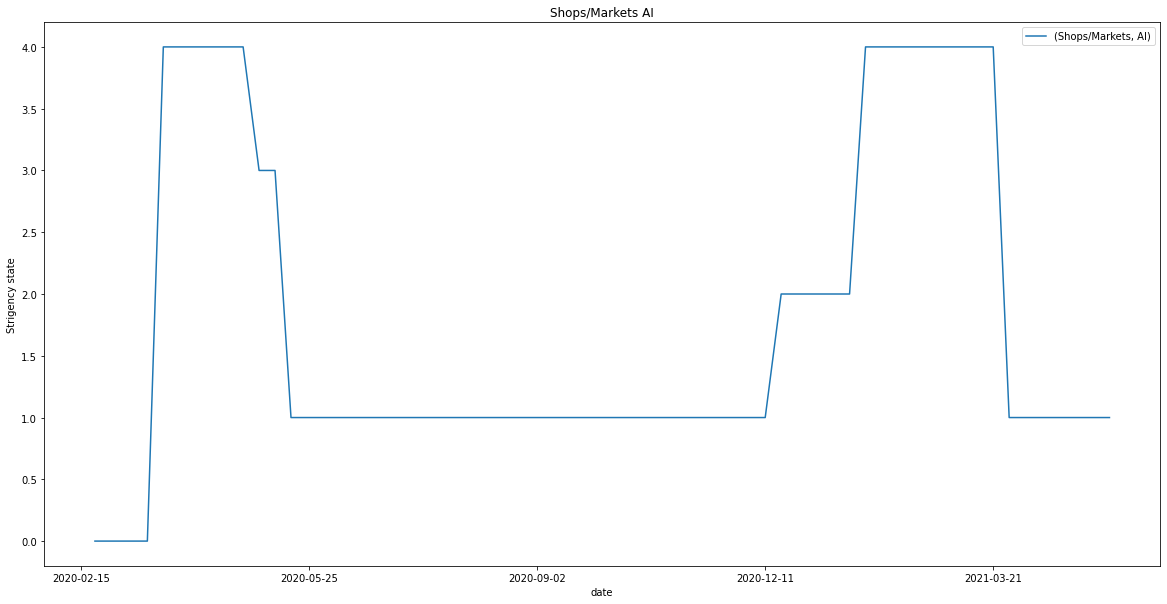

<Figure size 432x288 with 0 Axes>

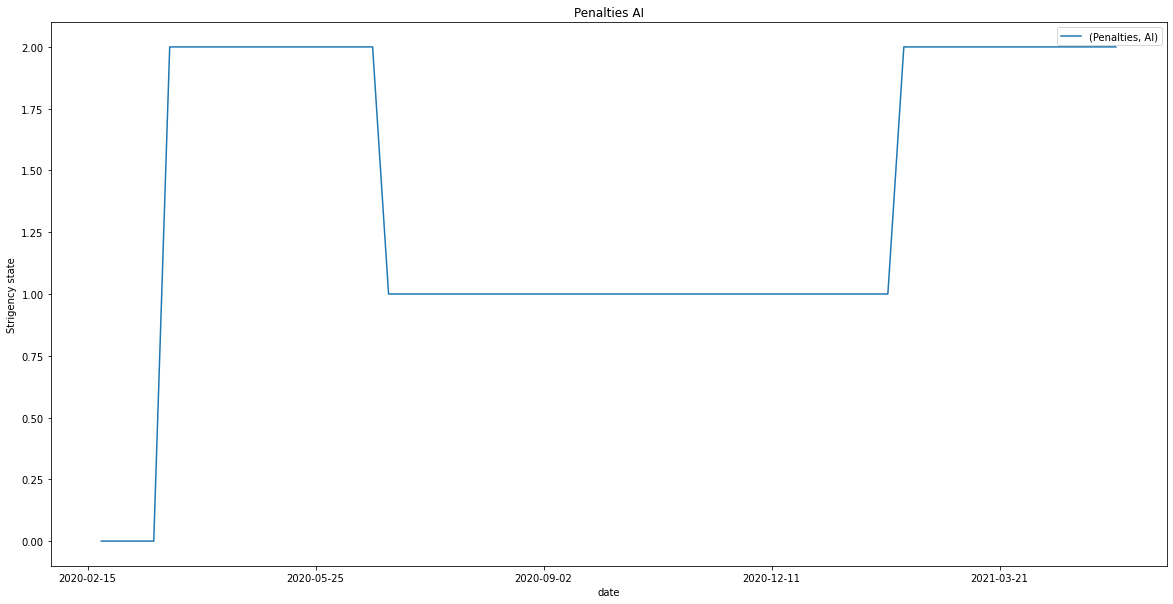

<Figure size 432x288 with 0 Axes>

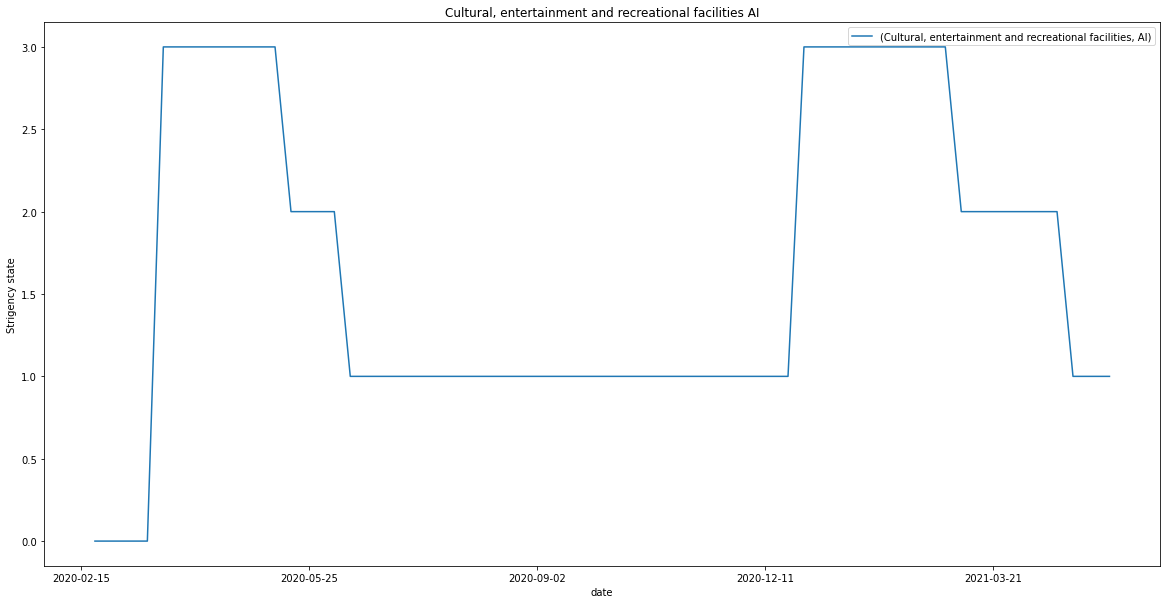

<Figure size 432x288 with 0 Axes>

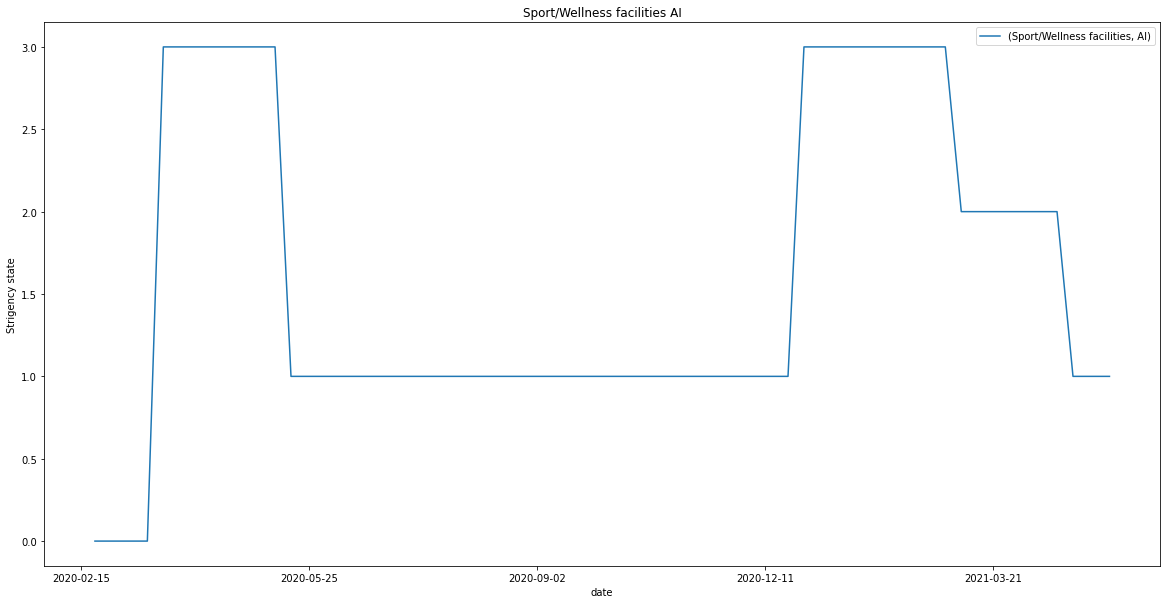

<Figure size 432x288 with 0 Axes>

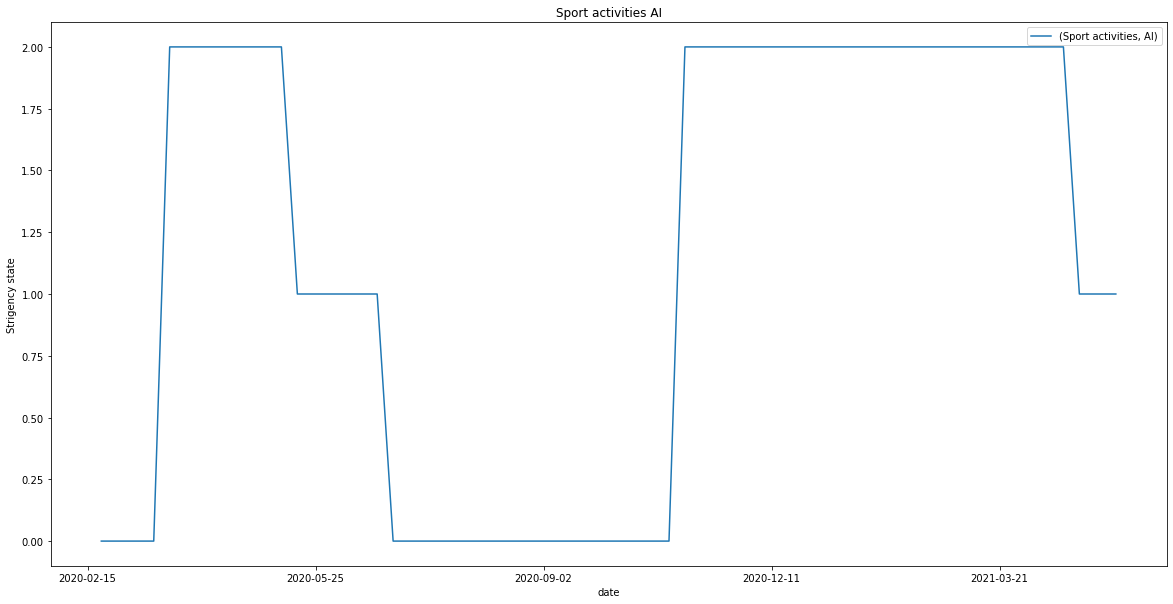

<Figure size 432x288 with 0 Axes>

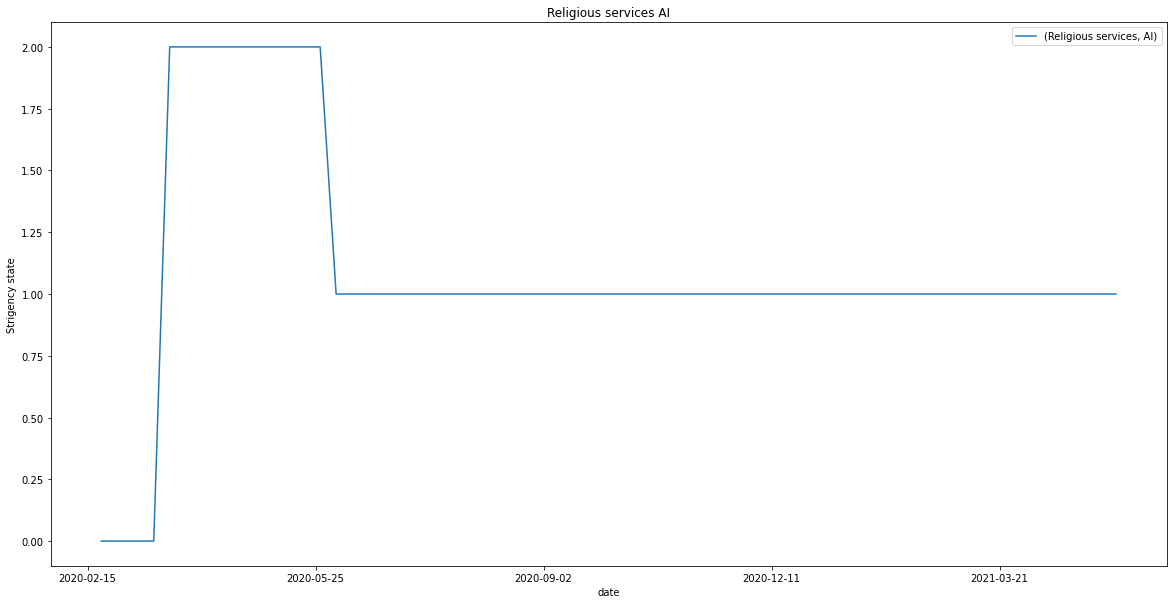

<Figure size 432x288 with 0 Axes>

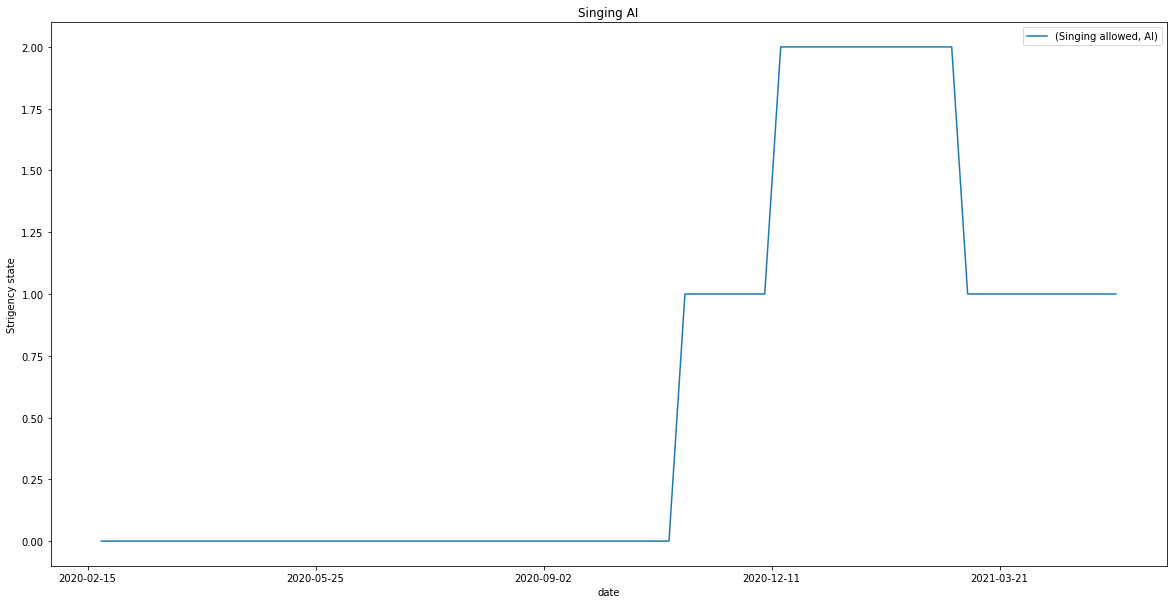

<Figure size 432x288 with 0 Axes>

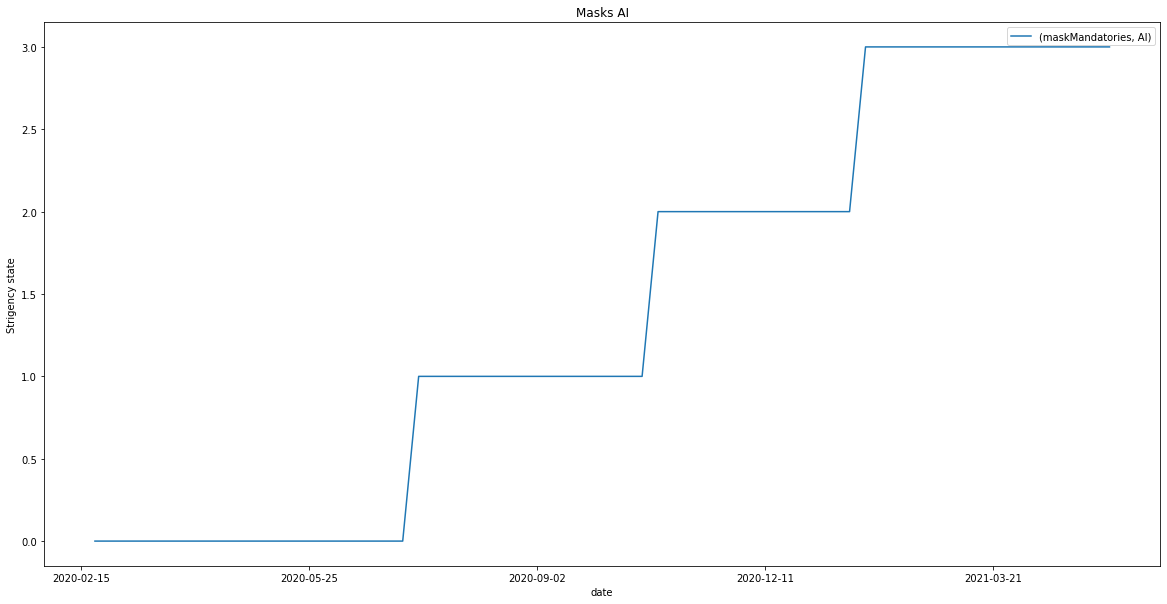

<Figure size 432x288 with 0 Axes>

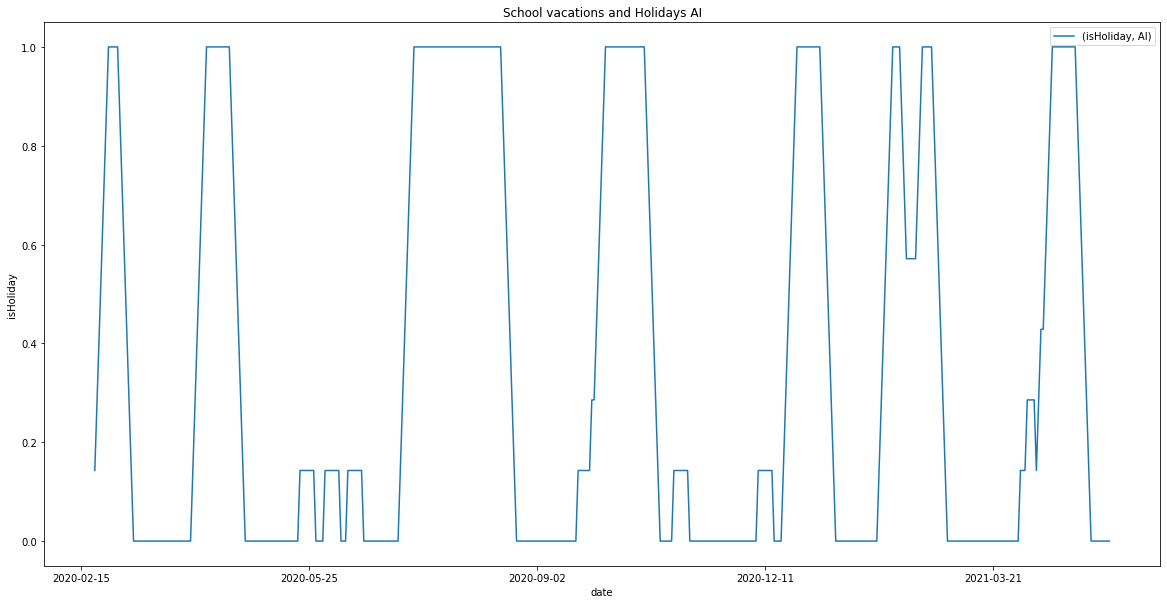

<Figure size 432x288 with 0 Axes>

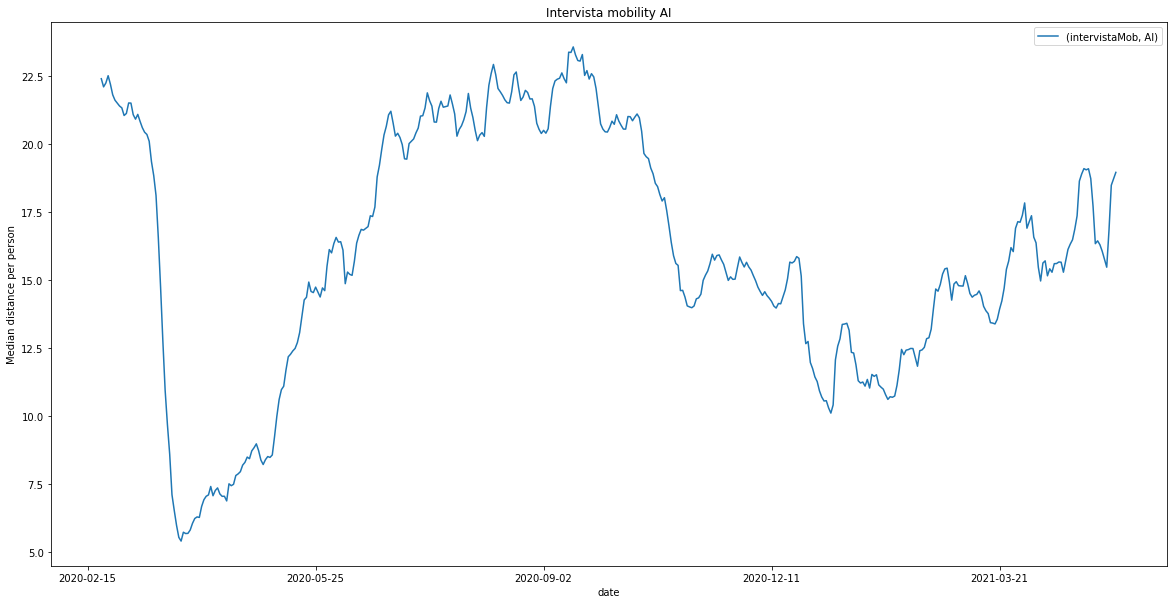

<Figure size 432x288 with 0 Axes>

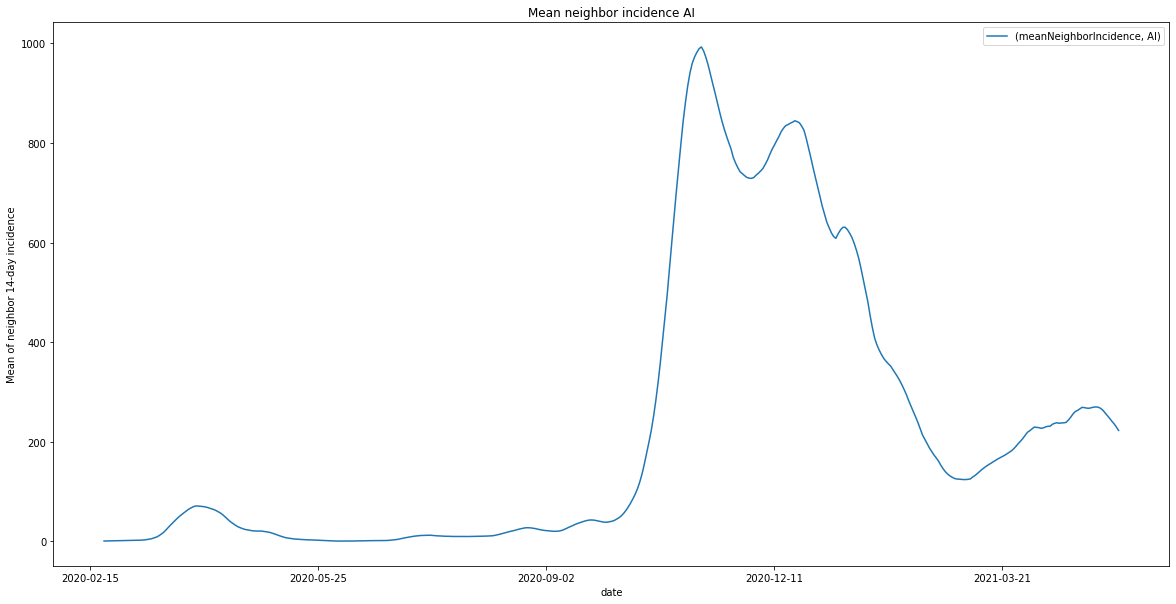

<Figure size 432x288 with 0 Axes>

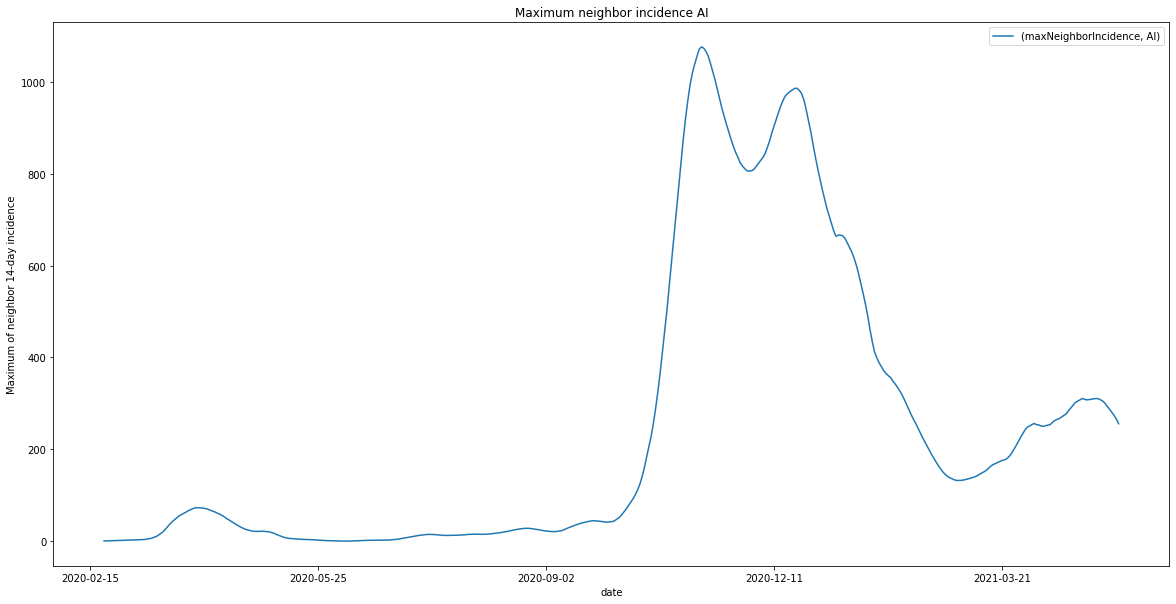

<Figure size 432x288 with 0 Axes>

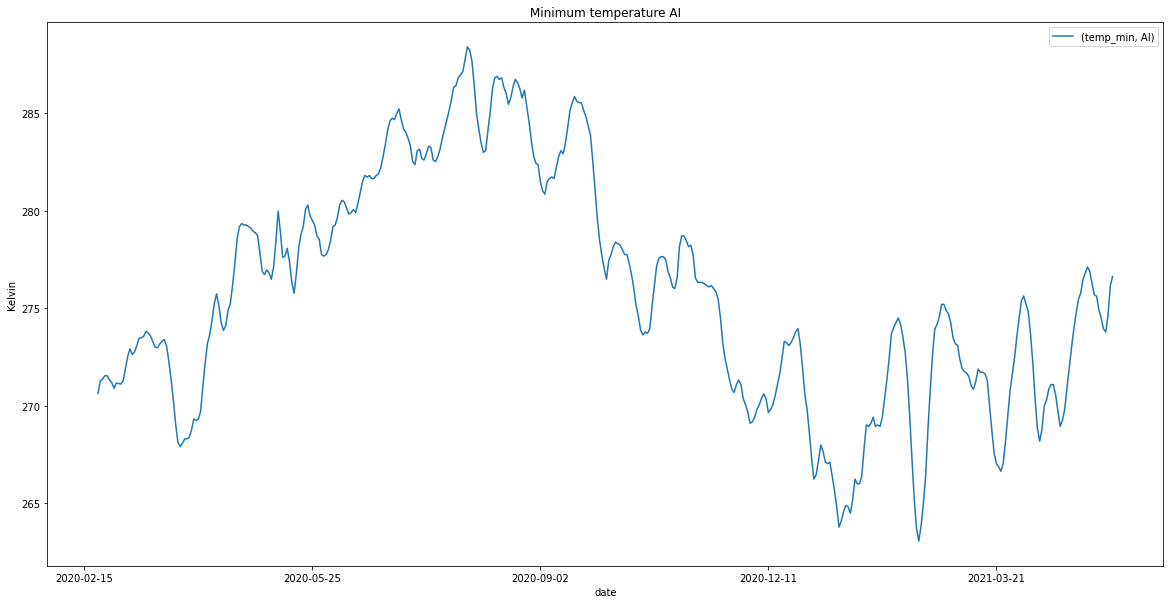

<Figure size 432x288 with 0 Axes>

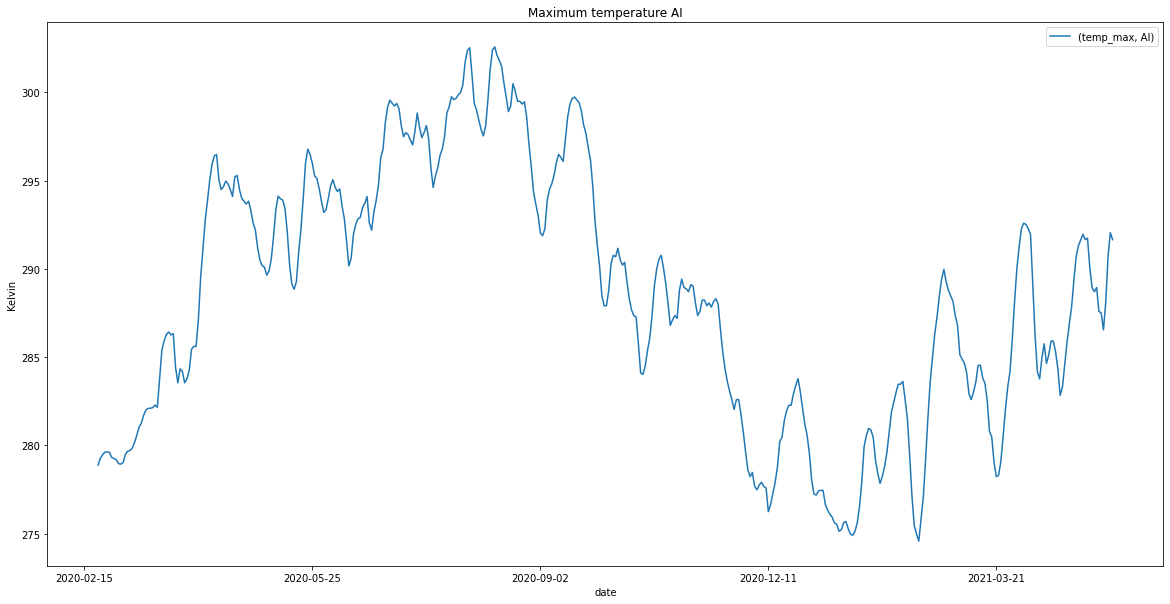

<Figure size 432x288 with 0 Axes>

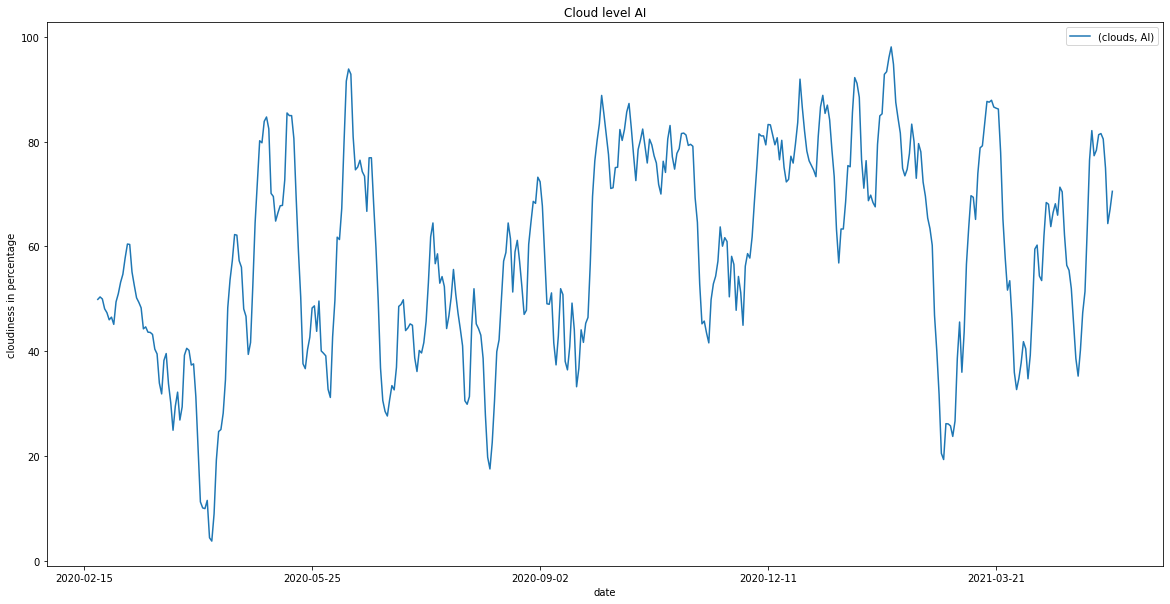

<Figure size 432x288 with 0 Axes>

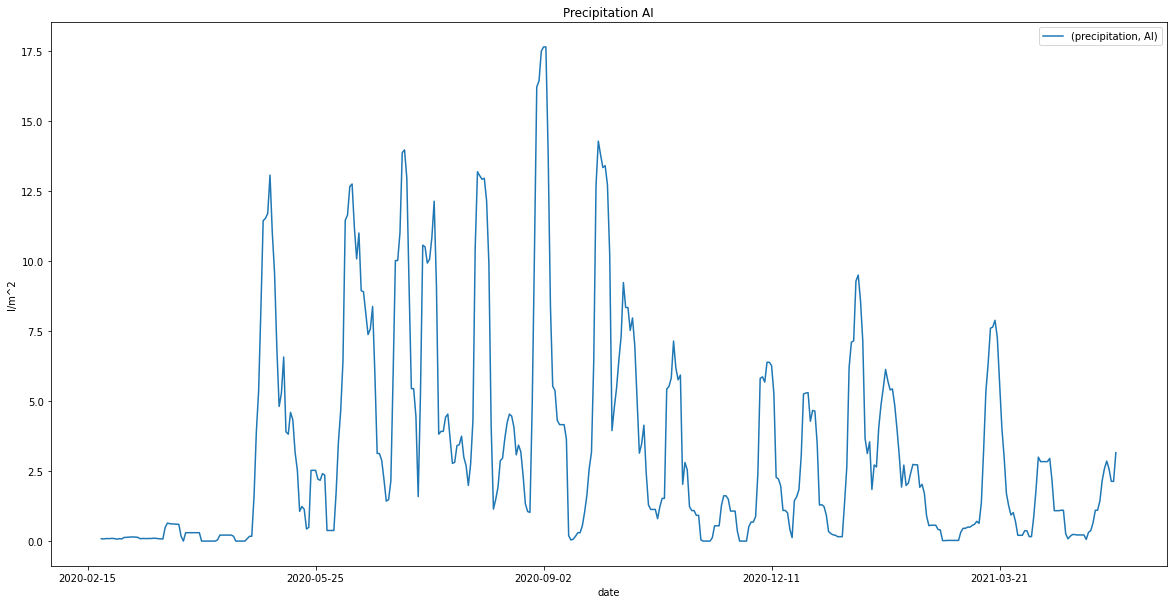

<Figure size 432x288 with 0 Axes>

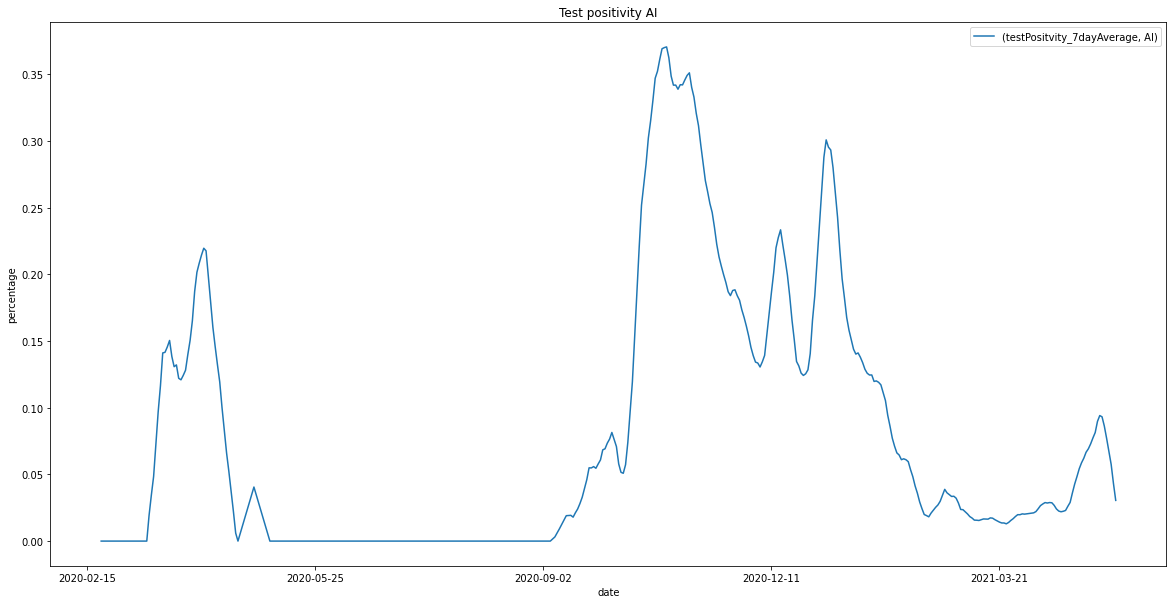

<Figure size 432x288 with 0 Axes>

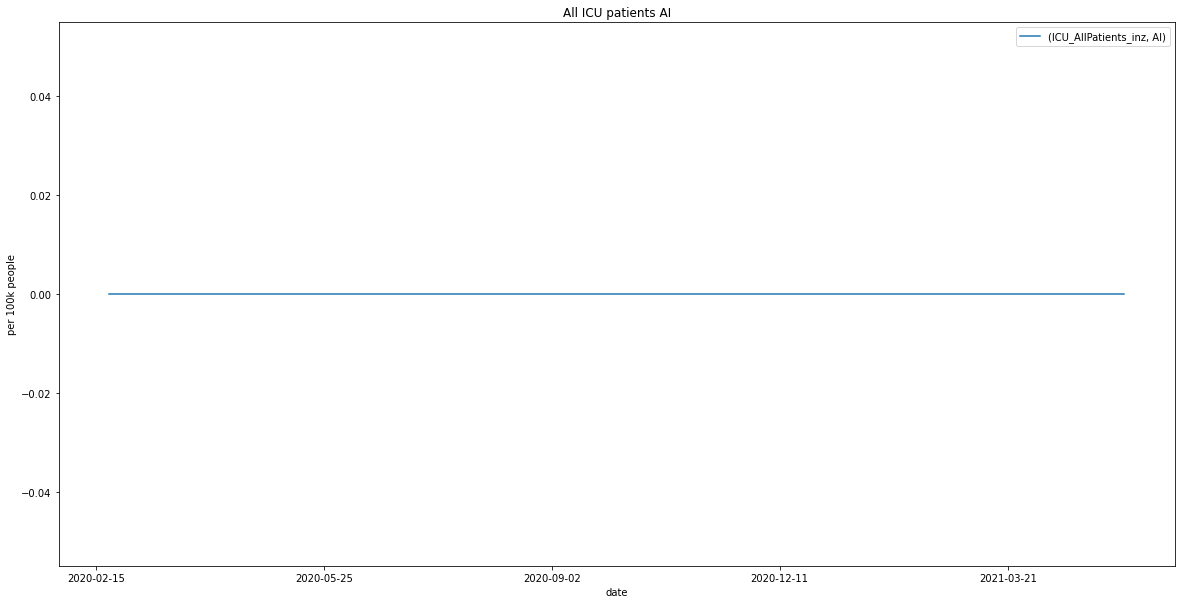

<Figure size 432x288 with 0 Axes>

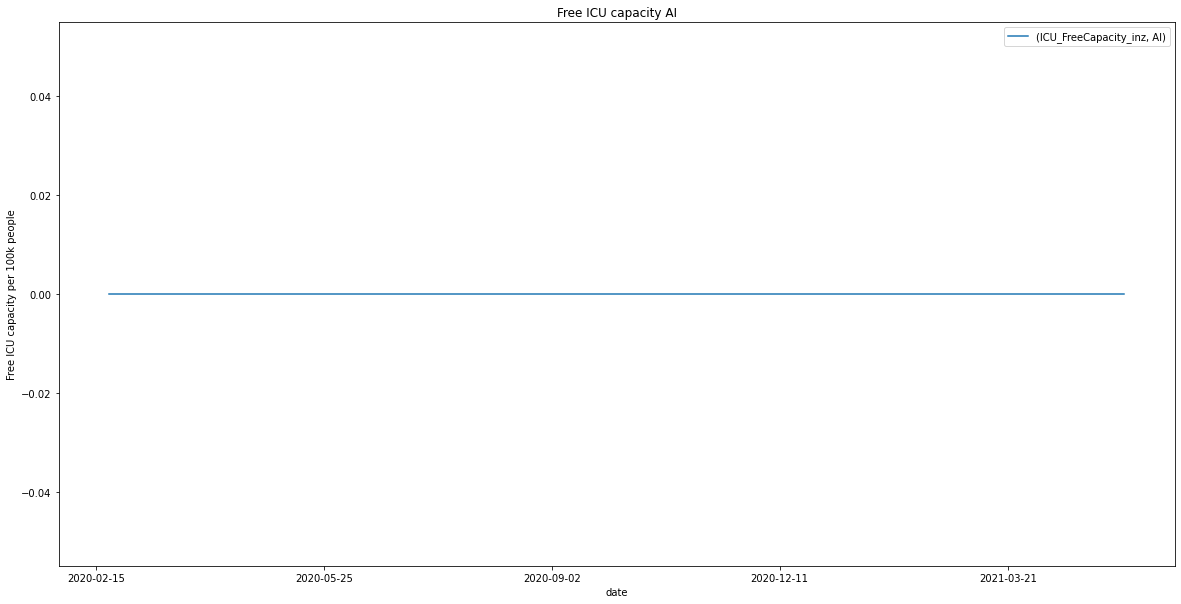

<Figure size 432x288 with 0 Axes>

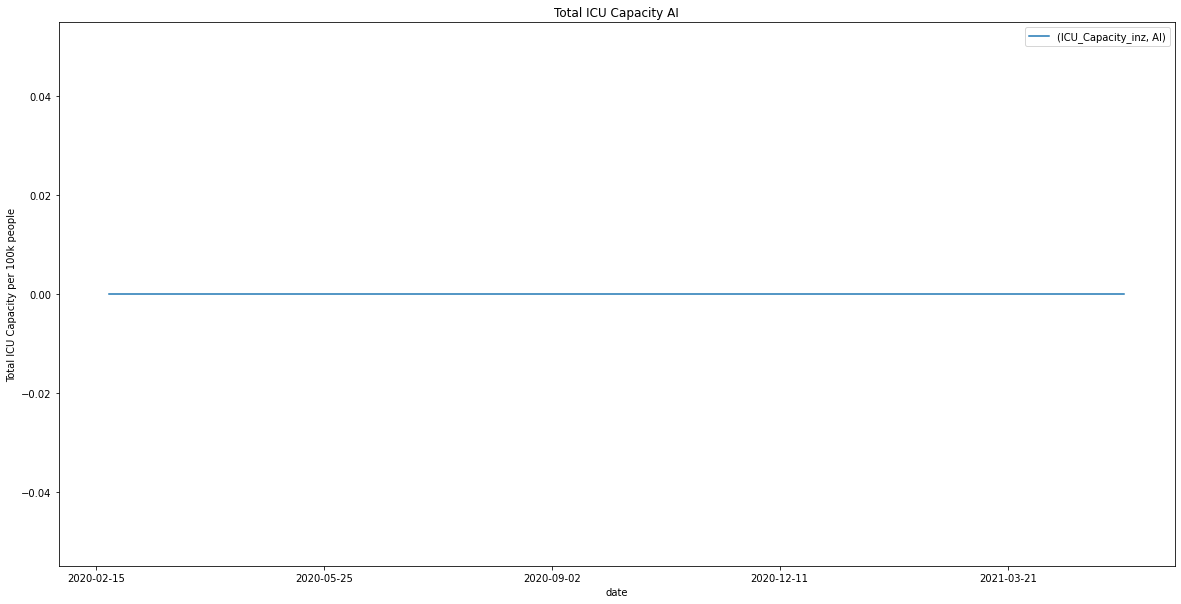

<Figure size 432x288 with 0 Axes>

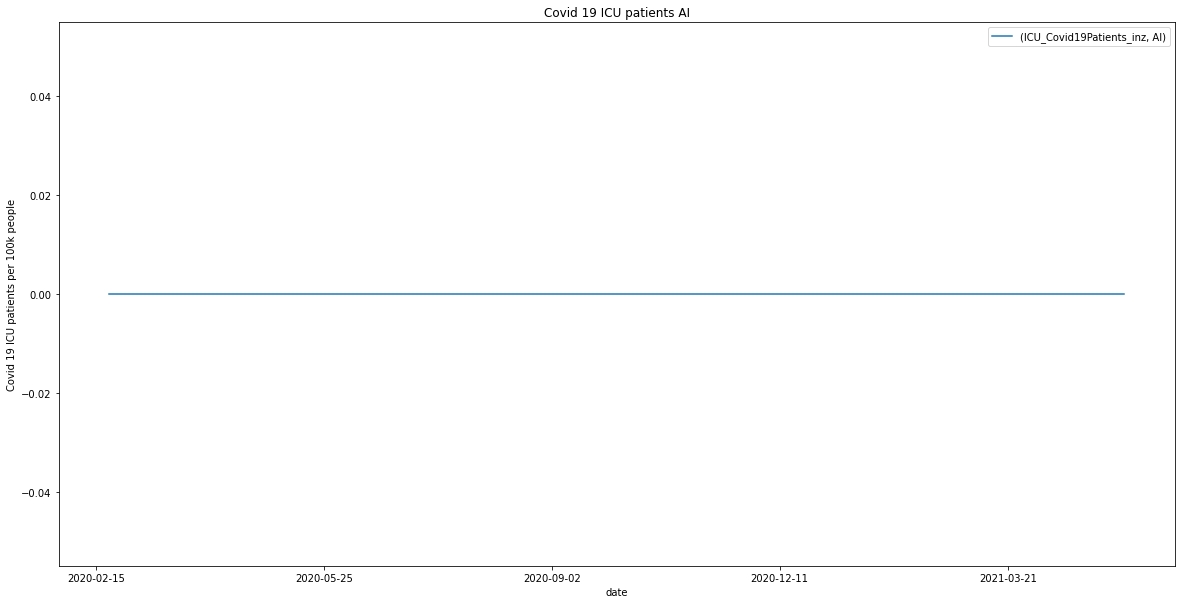

<Figure size 432x288 with 0 Axes>

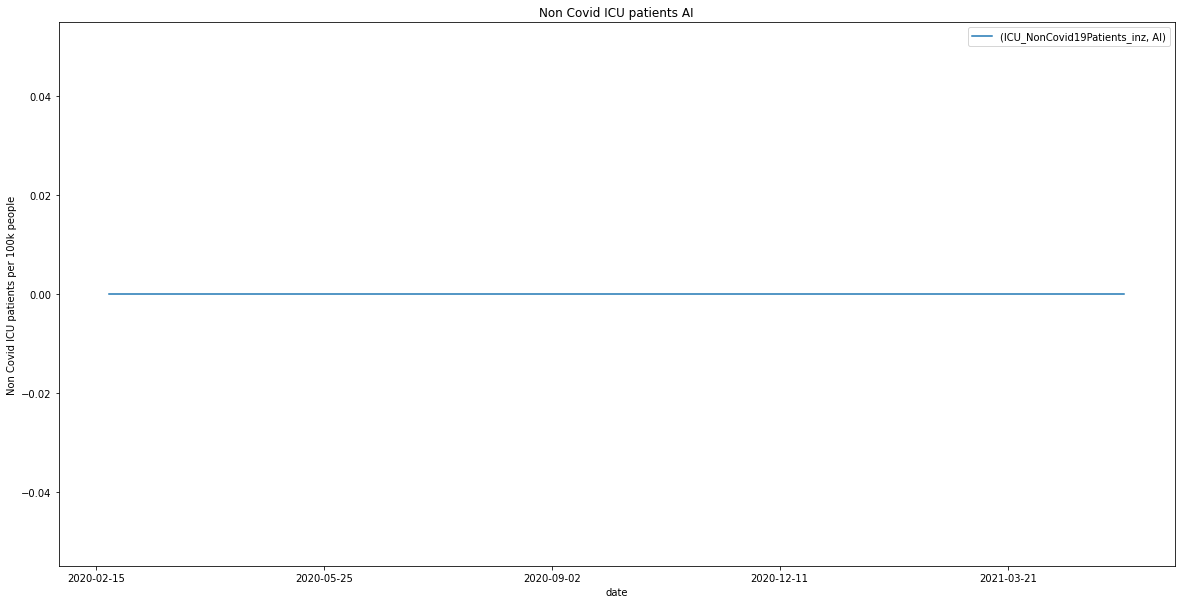

<Figure size 432x288 with 0 Axes>

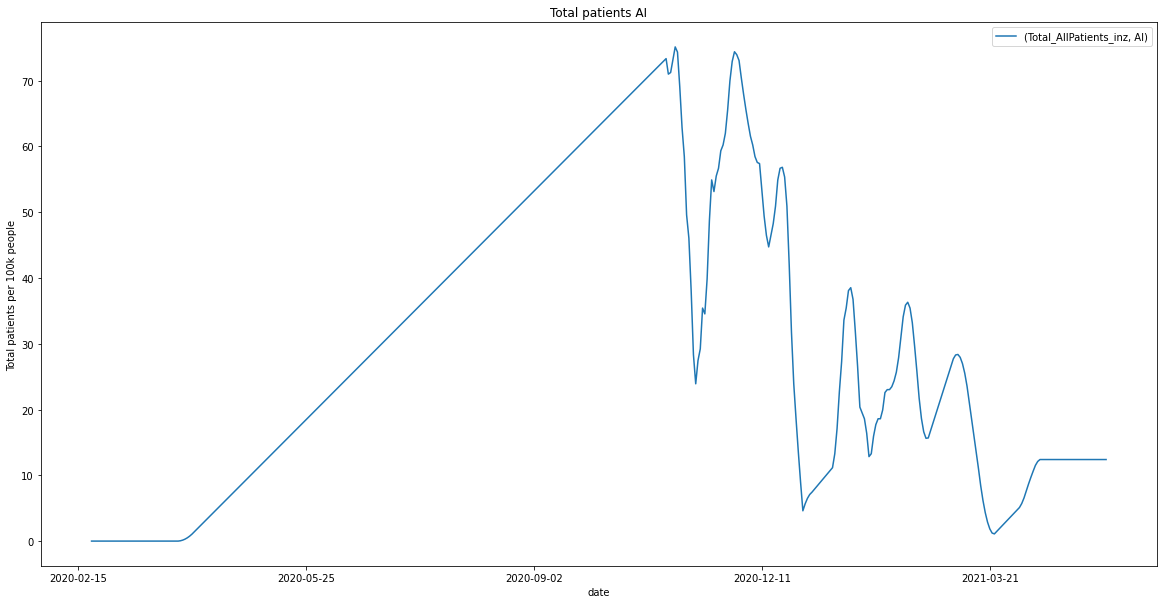

<Figure size 432x288 with 0 Axes>

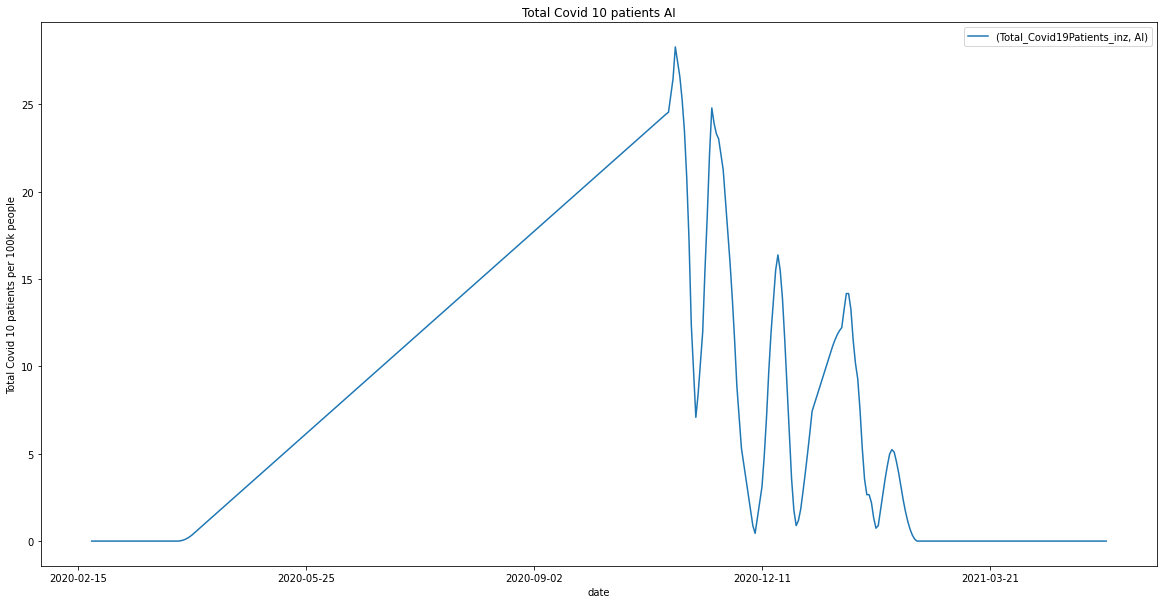

<Figure size 432x288 with 0 Axes>

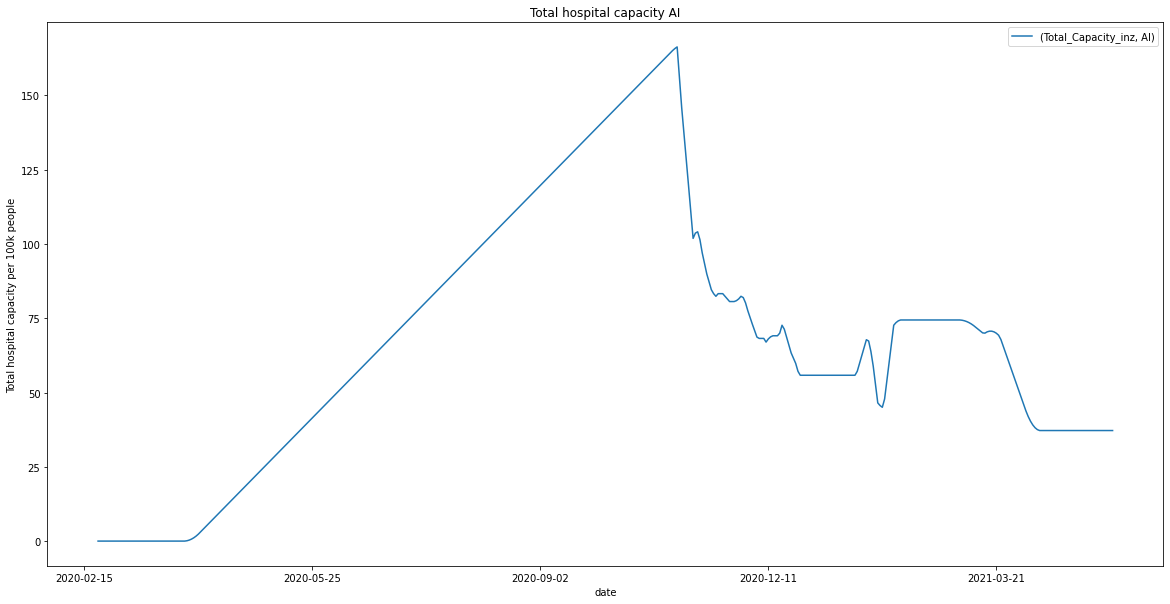

<Figure size 432x288 with 0 Axes>

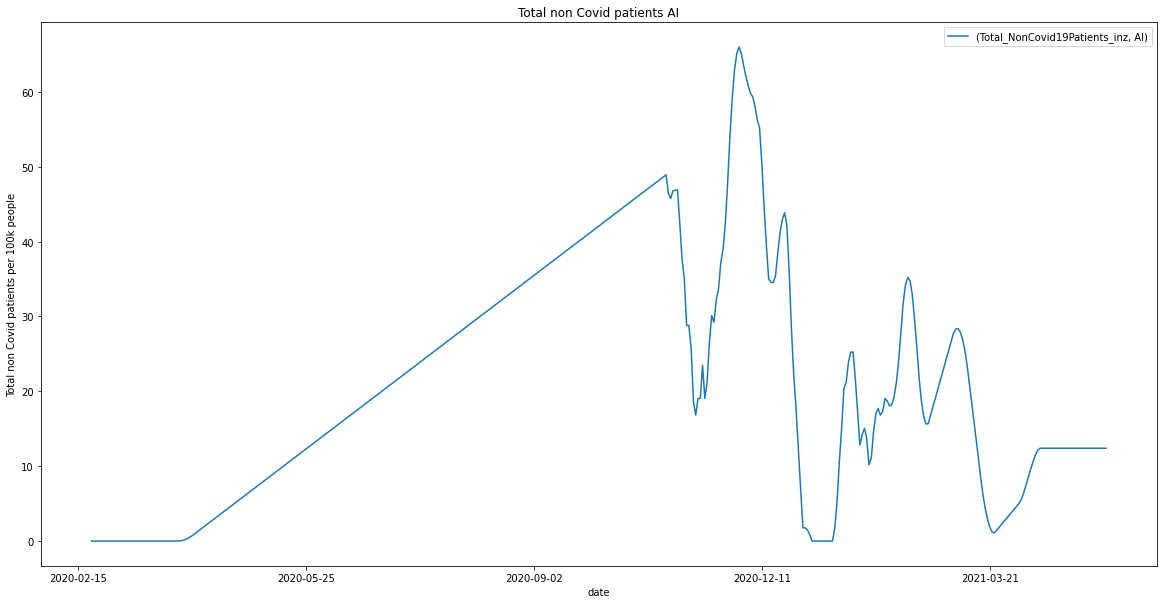

<Figure size 432x288 with 0 Axes>

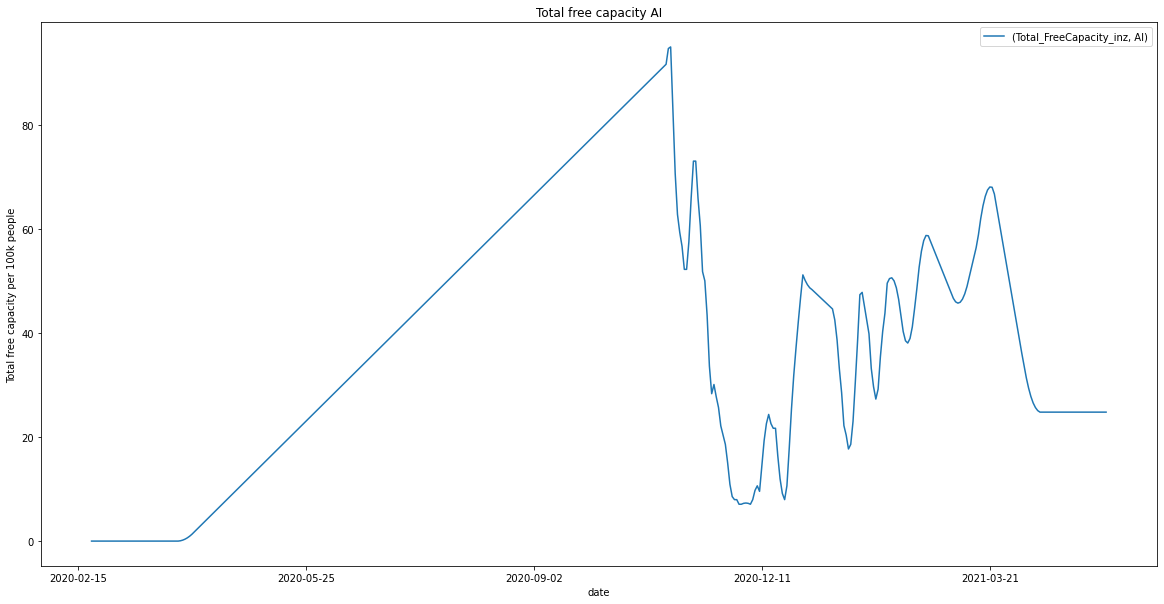

['VaccDosesAdministeredper100PersonsTotal_7dayAverage_AI.png',
 'FullyVaccPersonsper100PersonsTotal_7dayAverage_AI.png',
 'variant_perc_7dayAverage_AI.png',
 'case_inz_entries_7dayAverage_AI.png',
 'case_inzsumTotal_AI.png',
 'hosp_inz_entries_7dayAverage_AI.png',
 'hosp_inzsumTotal_AI.png',
 'death_inz_entries_7dayAverage_AI.png',
 'death_inzsumTotal_AI.png',
 'test_inz_entries_7dayAverage_AI.png',
 'test_inzsumTotal_AI.png',
 'median_R_mean_AI.png',
 'R_error_AI.png',
 'retail_and_recreation_percent_change_from_baseline_AI.png',
 'grocery_and_pharmacy_percent_change_from_baseline_AI.png',
 'parks_percent_change_from_baseline_AI.png',
 'transit_stations_percent_change_from_baseline_AI.png',
 'workplaces_percent_change_from_baseline_AI.png',
 'residential_percent_change_from_baseline_AI.png',
 'kofStrigency_AI.png',
 'Borders_AI.png',
 'Events_AI.png',
 'Gatheringsprivateevents_AI.png',
 'Demonstrations_AI.png',
 'Primary(includeskindergarten)andlowersecondaryschool_AI.png',
 'Uppersec

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot generator to compare one features with multiple cantons 
df = pd.DataFrame(index=dailyFeatures['JU'].index)
cantonSelection = ['AI']
featureTitles = { #(Title, y-axis)
    'VaccDosesAdministered per100PersonsTotal_7dayAverage':('Total vaccine doses administered','total per 100 people'),
    'FullyVaccPersons per100PersonsTotal_7dayAverage':('Fully vaccinated people','total per 100 people'),
    'variant_perc_7dayAverage':('Percentage of variants of concern','Percentage'),
    'case_inz_entries_7dayAverage':('Case incidence','Cases per 100k people'),
    'case_inzsumTotal':('Total case incidence','Total cases per 100k people'),
    'hosp_inz_entries_7dayAverage':('Hospitalization incidence','Hospitalizations per 100k people'),
    'hosp_inzsumTotal':('Total hospitalization incidence','Hospitalizations per 100k people'),
    'death_inz_entries_7dayAverage':('Death incidence','Deaths per 100k people'),
    'death_inzsumTotal':('Total death incidence','Total deaths per 100k people'),
    'test_inz_entries_7dayAverage':('Test incidence','Tests per 100k people'),
    'test_inzsumTotal':('Total test incidence','Total tests per 100k people'),
    'median_R_mean':('Estimated reproductive number R','reproductive number R'),
    'R_error':('R confidence','high-low confidence intervall'),
    'retail_and_recreation_percent_change_from_baseline':('retail & recreation mobility','percent change from baseline'),
    'grocery_and_pharmacy_percent_change_from_baseline':('grocery & pharmacy mobility','percent change from baseline'),
    'parks_percent_change_from_baseline':('park mobility','percent change from baseline'),
    'transit_stations_percent_change_from_baseline':('transit station mobility','percent change from baseline'),
    'workplaces_percent_change_from_baseline':('workplace mobility','percent change from baseline'),
    'residential_percent_change_from_baseline':('residential mobility','percent change from baseline'),
    'kofStrigency':('KOF strigency plus index','strigency values'), 
    'Borders':('Borders','Strigency state'),
    'Events':('Events','Strigency state'),
    'Gatherings/private events':('Gatherings/private events','Strigency state'),
    'Demonstrations':('Demonstrations','Strigency state'),
    'Primary (includes kindergarten) and lower secondary school':('Primary (includes kindergarten) and lower secondary school','Strigency state'),
    'Upper secondary school, vocational schools and higher education':('Upper secondary school, vocational schools and higher education','Strigency state'),
    'Universities and other educational establishments':('Universities and other educational establishments','Strigency state'),
    'Mountain railways':('Mountain railways','Strigency state'),
    'Homeworking':('Homeworking','Strigency state'),
    'Restaurants':('Restaurants','Strigency state'),
    'Discos/Nightclubs':('Discos/Nightclubs','Strigency state'),
    'Shops/Markets':('Shops/Markets','Strigency state'),
    'Penalties':('Penalties','Strigency state'),
    'Cultural, entertainment and recreational facilities':('Cultural, entertainment and recreational facilities','Strigency state'),
    'Sport/Wellness facilities':('Sport/Wellness facilities','Strigency state'),
    'Sport activities':('Sport activities','Strigency state'),
    'Religious services':('Religious services','Strigency state'),
    'Singing allowed':('Singing','Strigency state'),
    'maskMandatories':('Masks','Strigency state'),
    'isHoliday':('School vacations and Holidays', 'isHoliday'),
    'intervistaMob':('Intervista mobility', 'Median distance per person'),   
    'meanNeighborIncidence':('Mean neighbor incidence', 'Mean of neighbor 14-day incidence'),
    'maxNeighborIncidence':('Maximum neighbor incidence', 'Maximum of neighbor 14-day incidence'),
    'temp_min':('Minimum temperature','Kelvin'),
    'temp_max':('Maximum temperature','Kelvin'),
    'clouds':('Cloud level','cloudiness in percentage'),
    'precipitation':('Precipitation','l/m^2'),
    'testPositvity_7dayAverage':('Test positivity','percentage'),
    'ICU_AllPatients_inz':('All ICU patients','per 100k people'),
    'ICU_FreeCapacity_inz':('Free ICU capacity','Free ICU capacity per 100k people'),
    'ICU_Capacity_inz':('Total ICU Capacity','Total ICU Capacity per 100k people'),
    'ICU_Covid19Patients_inz':('Covid 19 ICU patients','Covid 19 ICU patients per 100k people'),
    'ICU_NonCovid19Patients_inz':('Non Covid ICU patients','Non Covid ICU patients per 100k people'),
    'Total_AllPatients_inz':('Total patients','Total patients per 100k people'),
    'Total_Covid19Patients_inz':('Total Covid 10 patients','Total Covid 10 patients per 100k people'),
    'Total_Capacity_inz':('Total hospital capacity','Total hospital capacity per 100k people'),
    'Total_NonCovid19Patients_inz':('Total non Covid patients','Total non Covid patients per 100k people'),
    'Total_FreeCapacity_inz':('Total free capacity','Total free capacity per 100k people'),
}

for cantonId in cantonKeys:
    for f in featureTitles:
        df[f,cantonId] = dailyFeatures[cantonId][[f]]

listOfPics = []
for f in featureTitles:
    #plot all cantons
    #df[[(f,cantonId) for cantonId in cantonKeys]].plot(kind='line', title=featureTitles[f][0], ylabel=featureTitles[f][1],figsize=(20,10))
    #plt.savefig('plots/'+f.replace('/','').replace(' ','')+'_allCantons.png')
    
    #plot canton selection
    df[[(f,cantonId) for cantonId in cantonSelection]].rolling(window=7).mean().plot(kind='line', title=featureTitles[f][0]+" "+listToStringComma(cantonSelection), ylabel=featureTitles[f][1],figsize=(20,10))
    plt.show()
    plt.savefig('plots/'+f.replace('/','').replace(' ','')+'_'+listToStringUnderline(cantonSelection)+'.png')
    listOfPics.append(f.replace('/','').replace(' ','')+'_'+listToStringUnderline(cantonSelection)+'.png')
display([e for e in listOfPics])

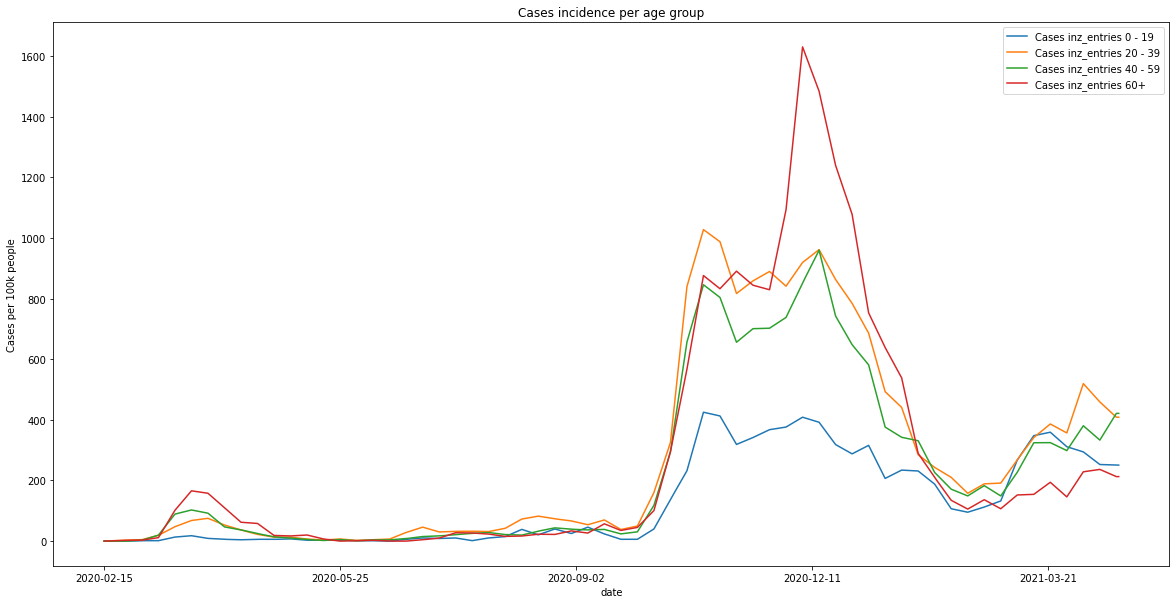

<Figure size 432x288 with 0 Axes>

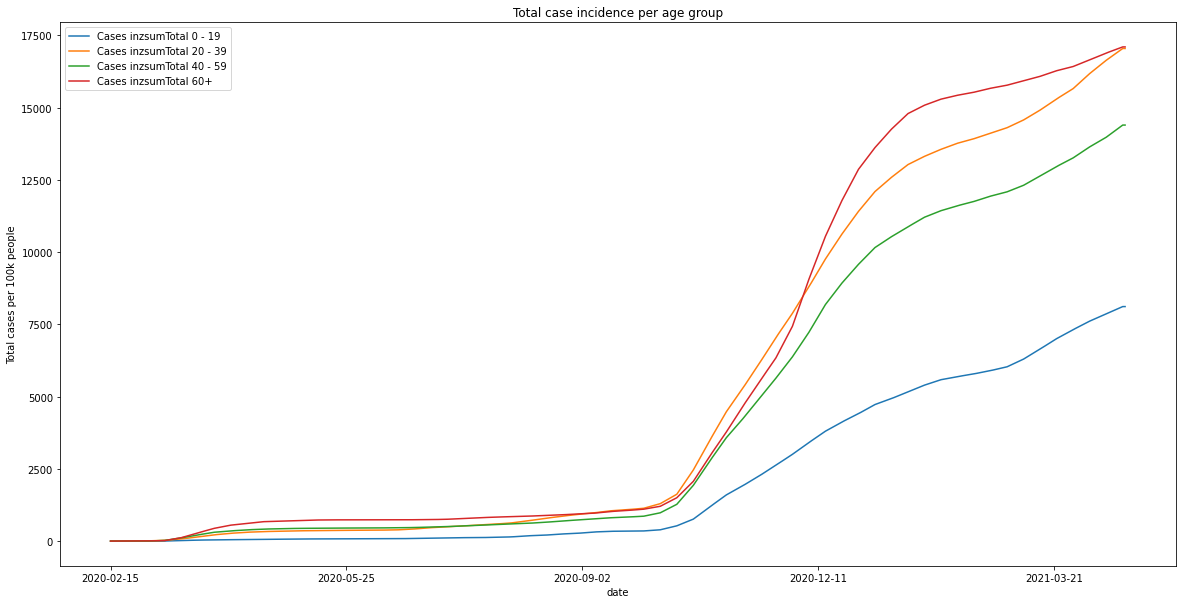

<Figure size 432x288 with 0 Axes>

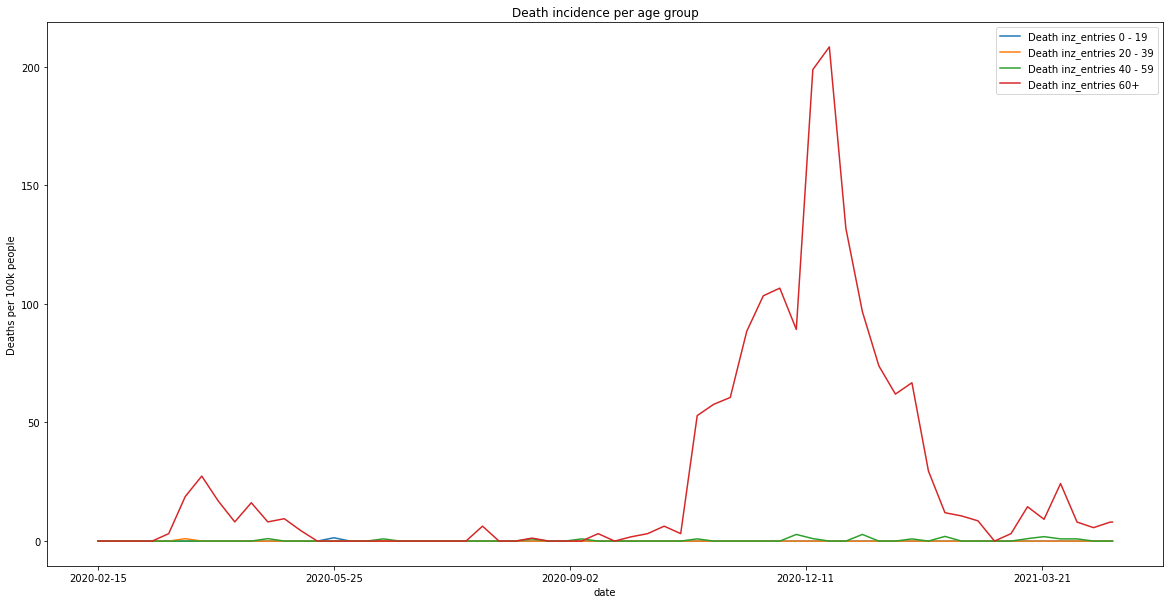

<Figure size 432x288 with 0 Axes>

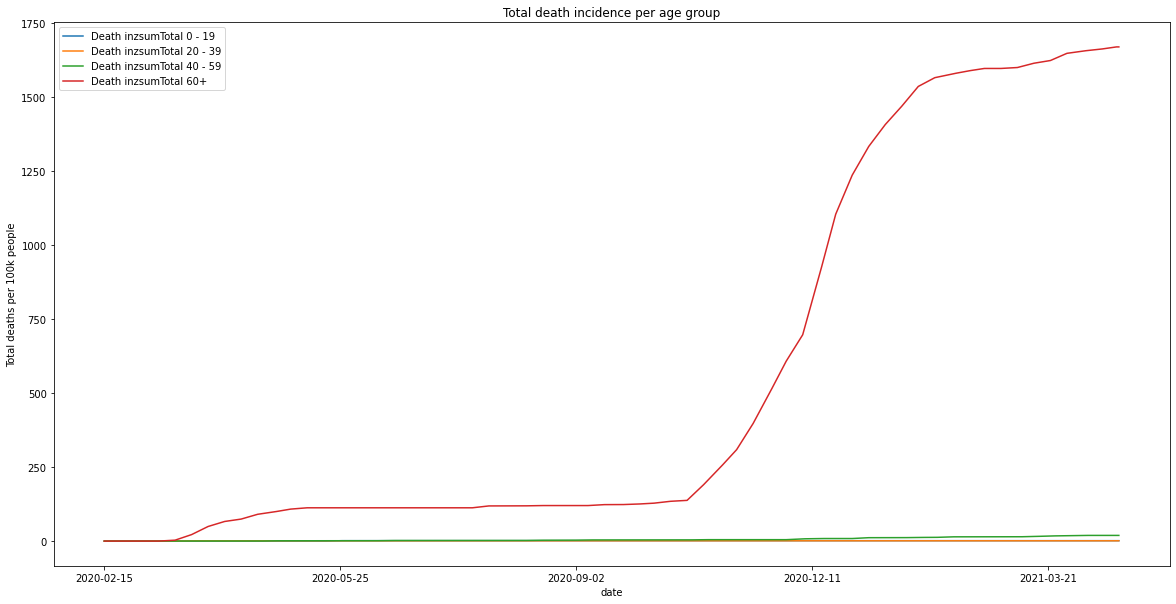

<Figure size 432x288 with 0 Axes>

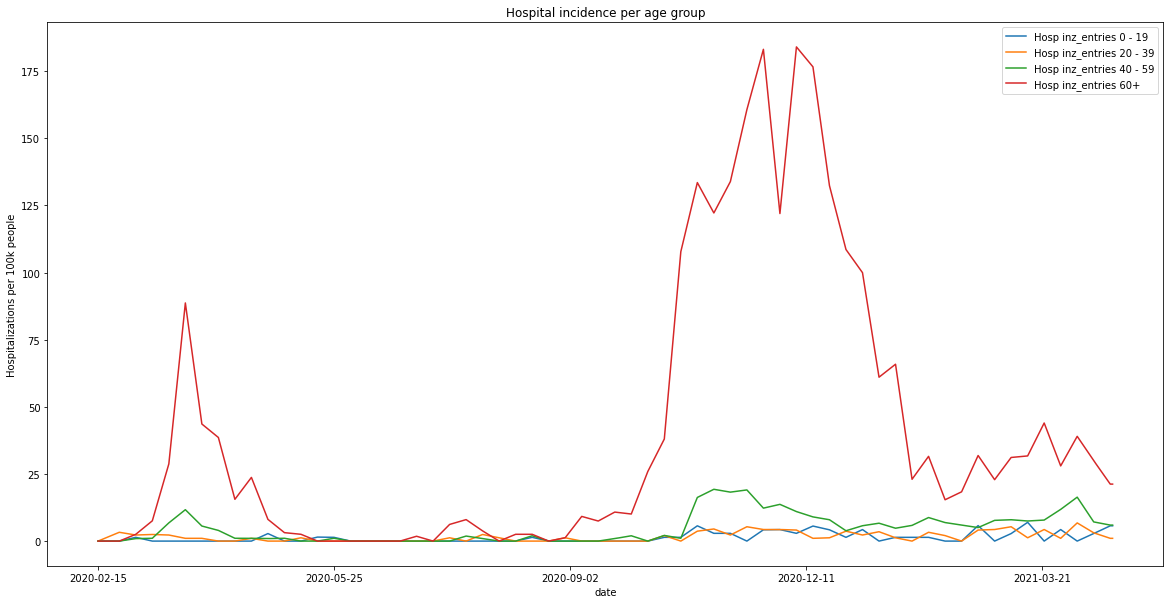

<Figure size 432x288 with 0 Axes>

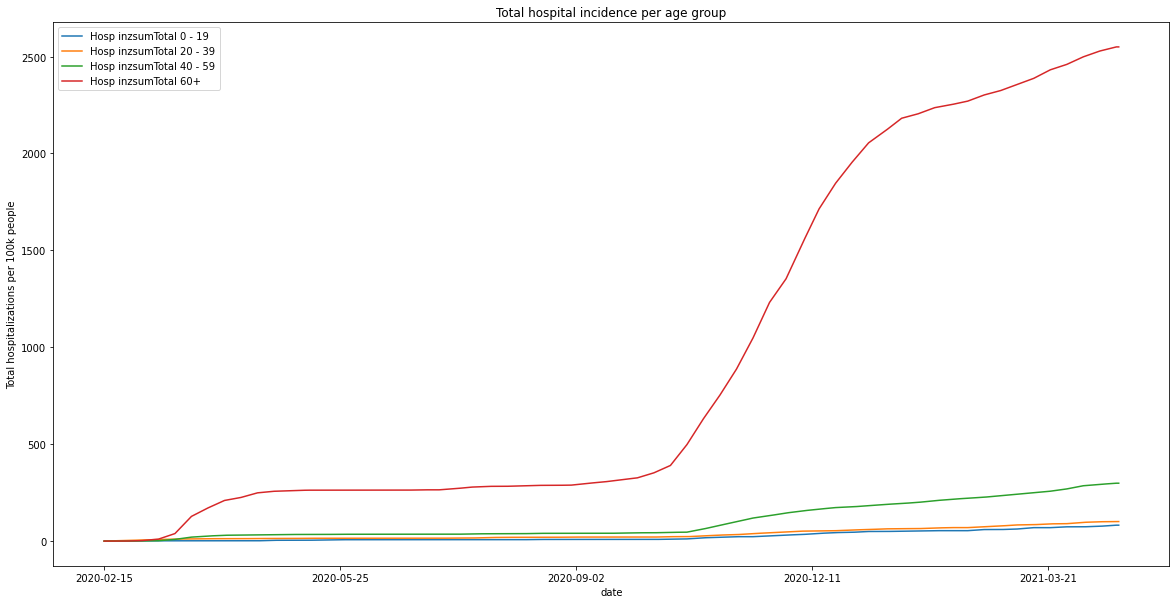

<Figure size 432x288 with 0 Axes>

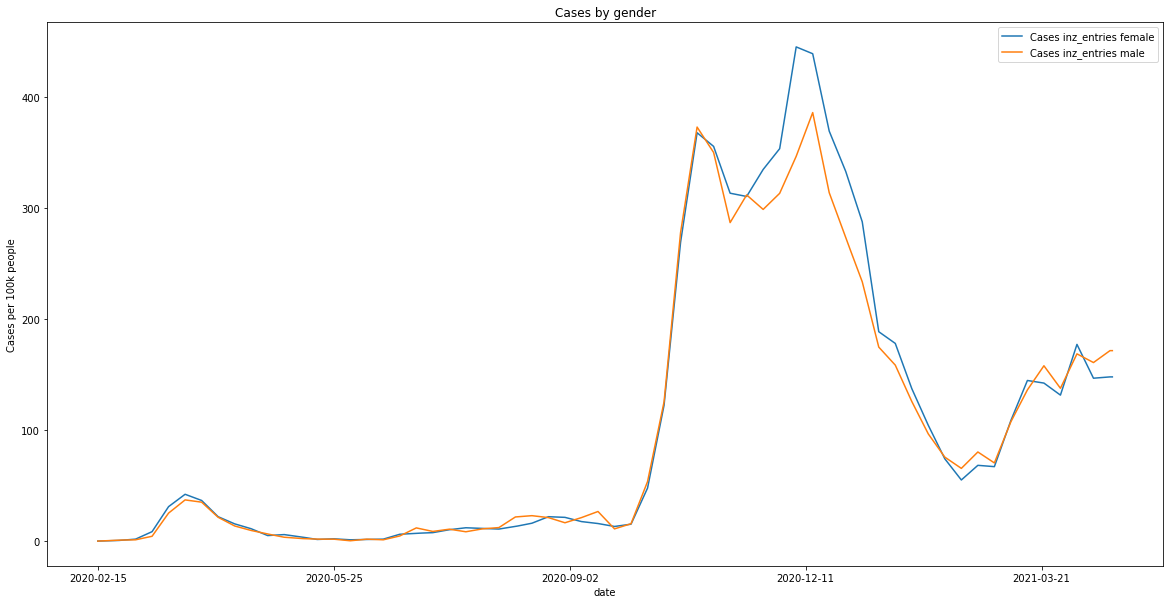

<Figure size 432x288 with 0 Axes>

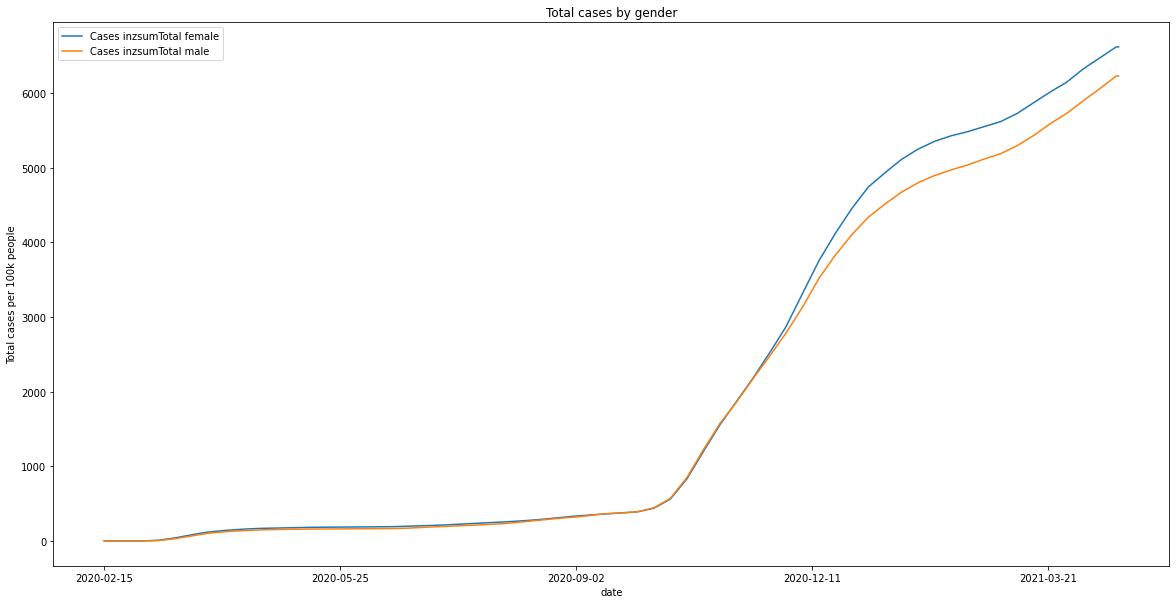

<Figure size 432x288 with 0 Axes>

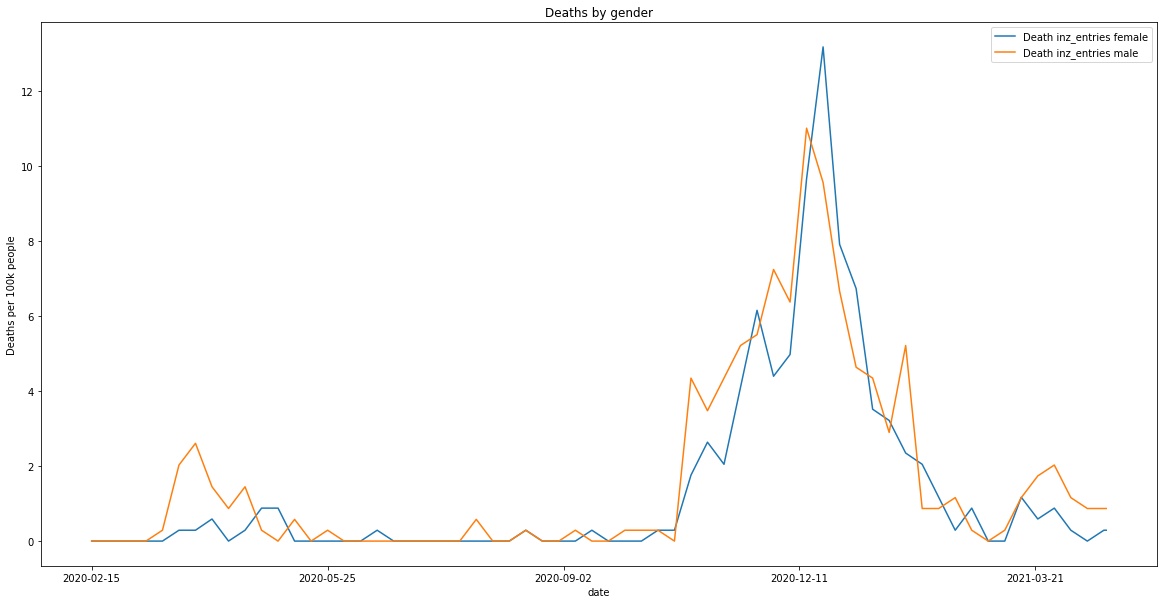

<Figure size 432x288 with 0 Axes>

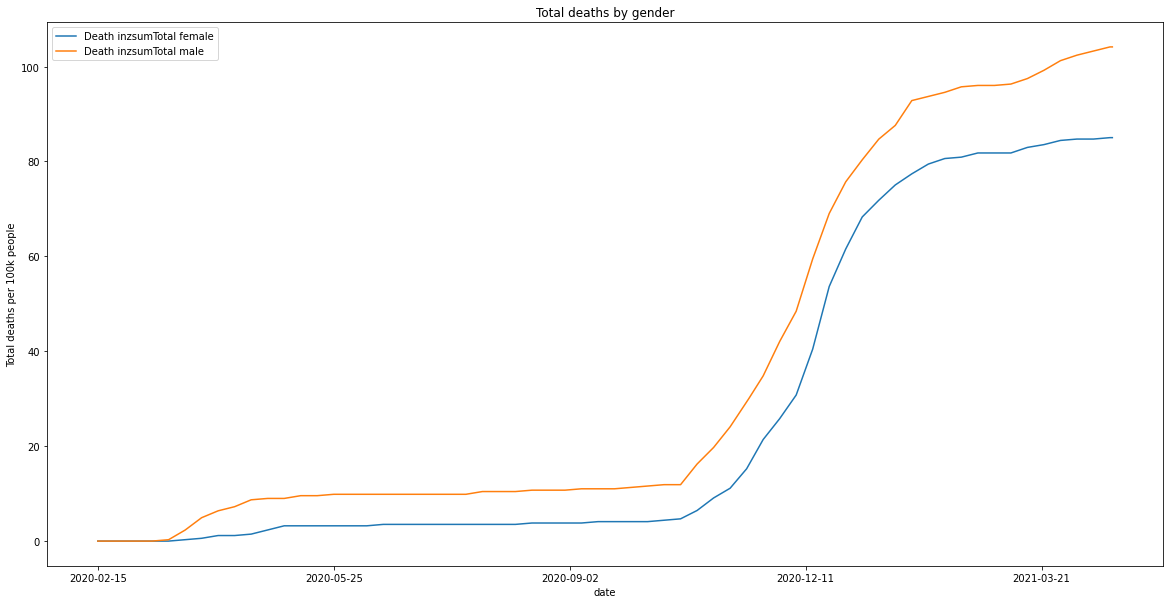

<Figure size 432x288 with 0 Axes>

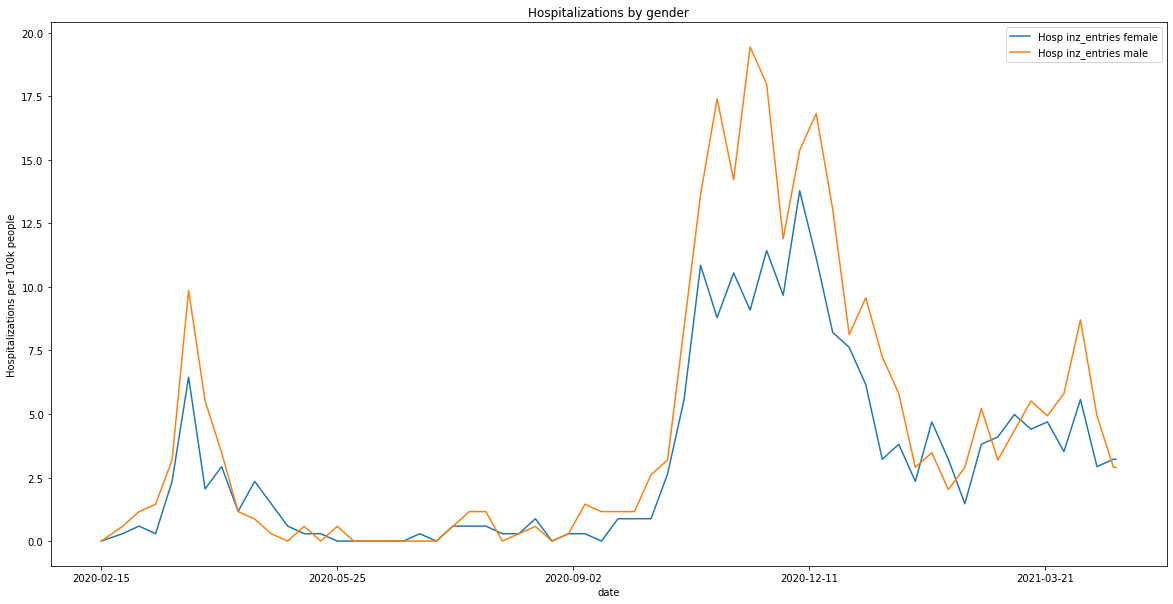

<Figure size 432x288 with 0 Axes>

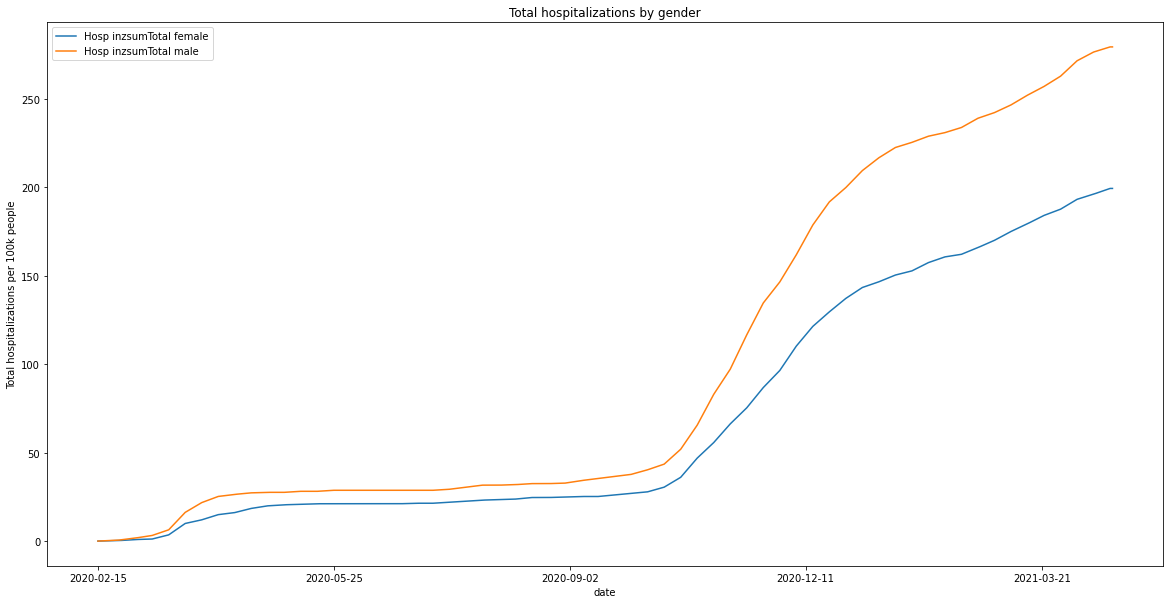

<Figure size 432x288 with 0 Axes>

In [20]:
# plot generator to compare multiple features in one canton
df = pd.DataFrame(index=dailyFeatures['AG'].index)
cantonSelection = 'AG'
featureLists = { #(Title, ylabel)
    'Cases incidence per age group':(['Cases inz_entries 0 - 19',
                            'Cases inz_entries 20 - 39','Cases inz_entries 40 - 59','Cases inz_entries 60+'],"Cases per 100k people"),
    'Total case incidence per age group':(['Cases inzsumTotal 0 - 19','Cases inzsumTotal 20 - 39',
                                           'Cases inzsumTotal 40 - 59','Cases inzsumTotal 60+'],"Total cases per 100k people"),
    'Death incidence per age group':(['Death inz_entries 0 - 19',
                                     'Death inz_entries 20 - 39',
                                     'Death inz_entries 40 - 59',
                                     'Death inz_entries 60+'],"Deaths per 100k people"),
    'Total death incidence per age group':(['Death inzsumTotal 0 - 19',  
                                         'Death inzsumTotal 20 - 39',          
                                         'Death inzsumTotal 40 - 59',
                                         'Death inzsumTotal 60+'],"Total deaths per 100k people"),
    'Hospital incidence per age group':([ 'Hosp inz_entries 0 - 19', 
                                         'Hosp inz_entries 20 - 39',
                                         'Hosp inz_entries 40 - 59',
                                         'Hosp inz_entries 60+'],"Hospitalizations per 100k people"),
    'Total hospital incidence per age group':(['Hosp inzsumTotal 0 - 19',
                                             'Hosp inzsumTotal 20 - 39',
                                             'Hosp inzsumTotal 40 - 59',
                                             'Hosp inzsumTotal 60+'],"Total hospitalizations per 100k people"),
    'Cases by gender':(['Cases inz_entries female',
                         'Cases inz_entries male'],"Cases per 100k people"),
    'Total cases by gender':(['Cases inzsumTotal female',
                             'Cases inzsumTotal male'],"Total cases per 100k people"),
    'Deaths by gender':(['Death inz_entries female',
                         'Death inz_entries male'],"Deaths per 100k people"),
    'Total deaths by gender':([ 'Death inzsumTotal female',
                                 'Death inzsumTotal male'],"Total deaths per 100k people"),
    'Hospitalizations by gender':([ 'Hosp inz_entries female',
                                     'Hosp inz_entries male'],"Hospitalizations per 100k people"),
    'Total hospitalizations by gender':([ 'Hosp inzsumTotal female',
                                         'Hosp inzsumTotal male'],"Total hospitalizations per 100k people")
}



for featureKey in featureLists:
    dailyFeatures[cantonSelection][featureLists[featureKey][0]].plot(kind='line', title=featureKey, figsize=(20,10), ylabel=featureLists[featureKey][1])
    plt.show()
    plt.savefig('plots/feature_comparison_'+featureKey.replace('/','').replace(' ','')+'_'+cantonSelection+'.png')



In [6]:
# MODEL INPUT
display([col for col in modelFeatures['AG']])

['Cases inz_entries 0 - 9_14_dayMean ',
 'Cases inz_entries 10 - 19_14_dayMean ',
 'Cases inz_entries 20 - 29_14_dayMean ',
 'Cases inz_entries 30 - 39_14_dayMean ',
 'Cases inz_entries 40 - 49_14_dayMean ',
 'Cases inz_entries 50 - 59_14_dayMean ',
 'Cases inz_entries 60 - 69_14_dayMean ',
 'Cases inz_entries 70 - 79_14_dayMean ',
 'Cases inz_entries 80+_14_dayMean ',
 'Cases inzsumTotal 0 - 9_14_dayMean ',
 'Cases inzsumTotal 10 - 19_14_dayMean ',
 'Cases inzsumTotal 20 - 29_14_dayMean ',
 'Cases inzsumTotal 30 - 39_14_dayMean ',
 'Cases inzsumTotal 40 - 49_14_dayMean ',
 'Cases inzsumTotal 50 - 59_14_dayMean ',
 'Cases inzsumTotal 60 - 69_14_dayMean ',
 'Cases inzsumTotal 70 - 79_14_dayMean ',
 'Cases inzsumTotal 80+_14_dayMean ',
 'Death inz_entries 0 - 9_14_dayMean ',
 'Death inz_entries 10 - 19_14_dayMean ',
 'Death inz_entries 20 - 29_14_dayMean ',
 'Death inz_entries 30 - 39_14_dayMean ',
 'Death inz_entries 40 - 49_14_dayMean ',
 'Death inz_entries 50 - 59_14_dayMean ',
 'Deat

In [ ]:
#df.plot(kind='scatter', x='x', y='y', label='Scatter')

'''
for cantonId in cantonKeys:
    y = 'maxNeighborIncidence'
    scondary_y = 'case_inz_entries'
    #df[[(y,cantonId),(scondary_y,cantonId)]].plot(kind='line', title="Maximum neighbor incidence vs. actual cantonal incidence",figsize=(20,10), y=[(y,cantonId),(scondary_y,cantonId)], secondary_y=[(scondary_y,cantonId)], sharey=False)  

df2=pd.DataFrame(index=df.index)
#display(pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1)))
df2[['maxNeighborIncidenceSwissMean']] = pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1))
df2[['meanNeighborIncidenceSwissMean']] = pd.DataFrame(df[[('meanNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1))
df2[['case_inz_entriesSwissMean']] = pd.DataFrame(df[[('case_inz_entries',cantonId) for cantonId in cantonKeys]].mean(axis=1))
#display(df2)
y = 'meanNeighborIncidenceSwissMean'
scondary_y = 'case_inz_entriesSwissMean'
df2[[y,scondary_y]].plot(kind='line', title="",figsize=(20,10), y=[y, scondary_y], secondary_y=scondary_y, sharey=False)
'''
#display(pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].sum(), columns=['SumMaxIncidence']).sort_values(by='SumMaxIncidence'))
#display(pd.DataFrame(df[[('meanNeighborIncidence',cantonId) for cantonId in cantonKeys]].sum(), columns=['SumMeanIncidence']).sort_values(by='SumMeanIncidence'))


'''
from scipy.ndimage.interpolation import shift
copy = dict['AG'].copy()

dict['AG']['case_entries_shifted'] = np.roll(np.array(copy['case_entries']), 14)


corr_matrix = dict['AG'].corr()
display(corr_matrix['case_entries_shifted'].sort_values(ascending=False))
'''